# AS4PA - Laboratory session 6

`Student:` **```Ardino Rocco```**<br>
`Master :` **```Physics of Data```**<br>
`Id     :` **```1231629```**<br>
`Mail   :` **```rocco.ardino@studenti.unipd.it```**<br>

# Index <a class="anchor" id="ExI"></a>

1. [Exercise 1](#Ex1.)<br>
    1.1. [Results assuming a uniform prior for $\mu$](#Ex1.1.)<br>
    1.2. [Results assuming a Jeffrey's prior for $\mu$](#Ex1.2.)<br>
    1.3. [95% credibility interval and comparison with normal approximation for the posterior distribution](#Ex1.3.)<br>
2. [Exercise 2](#Ex2.)<br>
3. [Exercise 3](#Ex3.)<br>
    3.1. [Results for different resolutions](#Ex3.1.)<br>
    3.2. [Results for different $A/B$ ratio](#Ex3.2.)<br>

**Before starting with the exercises, load packages for:**
* **a better plot visualization on jupyter notebook (```repr```);**
* **latex font for text (```latex2exp```);**
* **creating a grid from two vectors for 3D plots (```lattice```).**

In [1]:
library(repr)
library(latex2exp)
library(lattice)

**Moreover, let's define some useful functions for exercises solving:**

* **```compute.mean  :``` compute approximation of the mean through the definition;**
* **```compute.median:``` compute approximation of the median through the definition;**
* **```compute.var   :``` compute approximation of the variance through the definition;**
* **```get.x.dmax    :``` compute and get the most probable value (mode) of the distribution;**
* **```get.c.int     :``` compute and get the bounds of the XX% credibility interval.**

**```compute.mean``` function**

In [2]:
compute.mean <- function(x, d) {
    Dx   <- x[2] - x[1]
    mean <- sum(x * Dx * d)
    
    return(mean)
}

**```compute.median``` function**

In [3]:
compute.median <- function(x, d) {
    Dx <- x[2] - x[1]
    d  <- d*Dx
    
    for (i in 1:(length(d)-1)) {
        if (sum(d[1:i])<0.5 & sum(d[1:(i+1)])>0.5) {
            m   <- (sum(d[1:(i+1)]) - sum(d[1:i])) / (x[i+1] - x[i])
            q   <- sum(d[1:i])
            x.m <- (0.5 - q) / m + x[i]
        }
    }
    
    return(x.m)
}

**```compute.var``` function**

In [4]:
compute.var <- function(x, d) {
    Dx   <- x[2] - x[1]
    mean <- compute.mean(x, d)
    var  <- sum((mu-mean)^2 * Dx * d)
    
    return(var)
}

**```get.x.dmax``` function**

In [5]:
get.x.dmax <- function(x, d) {
    i   <- which.max(d)
    
    if (i == 1 | i==length(x)) {
        return(x[i])
    }
    
    # find most probable value through parabolic approximation
    x1 <- x[i-1]
    x2 <- x[i]
    x3 <- x[i+1]
    y1 <- d[i-1]
    y2 <- d[i]
    y3 <- d[i+1]
    
    den <- (x1 - x2) * (x1 - x3) * (x2 - x3)
    A   <- (x3 * (y2 - y1) + x2 * (y1 - y3) + x1 * (y3 - y2)) / den
    B   <- (x3*x3 * (y1 - y2) + x2*x2 * (y3 - y1) + x1*x1 * (y2 - y3)) / den
    C   <- (x2 * x3 * (x2 - x3) * y1 + x3 * x1 * (x3 - x1) * y2 + x1 * x2 * (x1 - x2) * y3) / den

    x.m <- -B / (2*A);
    
    return(x.m)
}

**```get.c.int``` function**

In [6]:
get.c.int <- function(x, d, cl=0.95) {
    delta.x <- x[2] - x[1]
    d       <- d*delta.x
    alpha   <- 1-cl
    
    # find credibility interval bounds through linear approximation
    for (i in 1:(length(d)-1)) {
        if (sum(d[1:i])<alpha/2 & sum(d[1:(i+1)])>alpha/2) {
            m   <- (sum(d[1:(i+1)]) - sum(d[1:i])) / (x[i+1] - x[i])
            q   <- sum(d[1:i])
            x.1 <- (alpha/2 - q) / m + x[i]
        }
        if (sum(d[1:i])<(1-alpha/2) & sum(d[1:(i+1)])>(1-alpha/2)) {
            m   <- (sum(d[1:(i+1)]) - sum(d[1:i])) / (x[i+1] - x[i])
            q   <- sum(d[1:i])
            x.2 <- (1 - alpha/2 - q) / m + x[i]
        }
    }
    
    return(c(x.1,x.2))
}

***
## Exercise 1 <a class="anchor" id="Ex1."></a>
* [Index](#ExI)
***

In [58]:
data <- c(4,1,3,1,3)

### 1.1. - Results assuming a uniform prior for $\mu$ <a class="anchor" id="Ex1.1."></a>

In [59]:
n.p <- 6001 # number of points in the plots
mu  <- seq(0.001, 6, length.out=n.p)
Dmu <- mu[2] - mu[1]

**Compute likelihood**

In [60]:
p.like <- rep(1, n.p)
for (i in 1:length(data)) {
    p.like <- p.like * dpois(x=data[i], lambda=mu)
}

In [61]:
p.post.u   <- p.like
p.post.n.u <- p.post.u / (Dmu*sum(p.post.u))

**Plot posterior PDF**

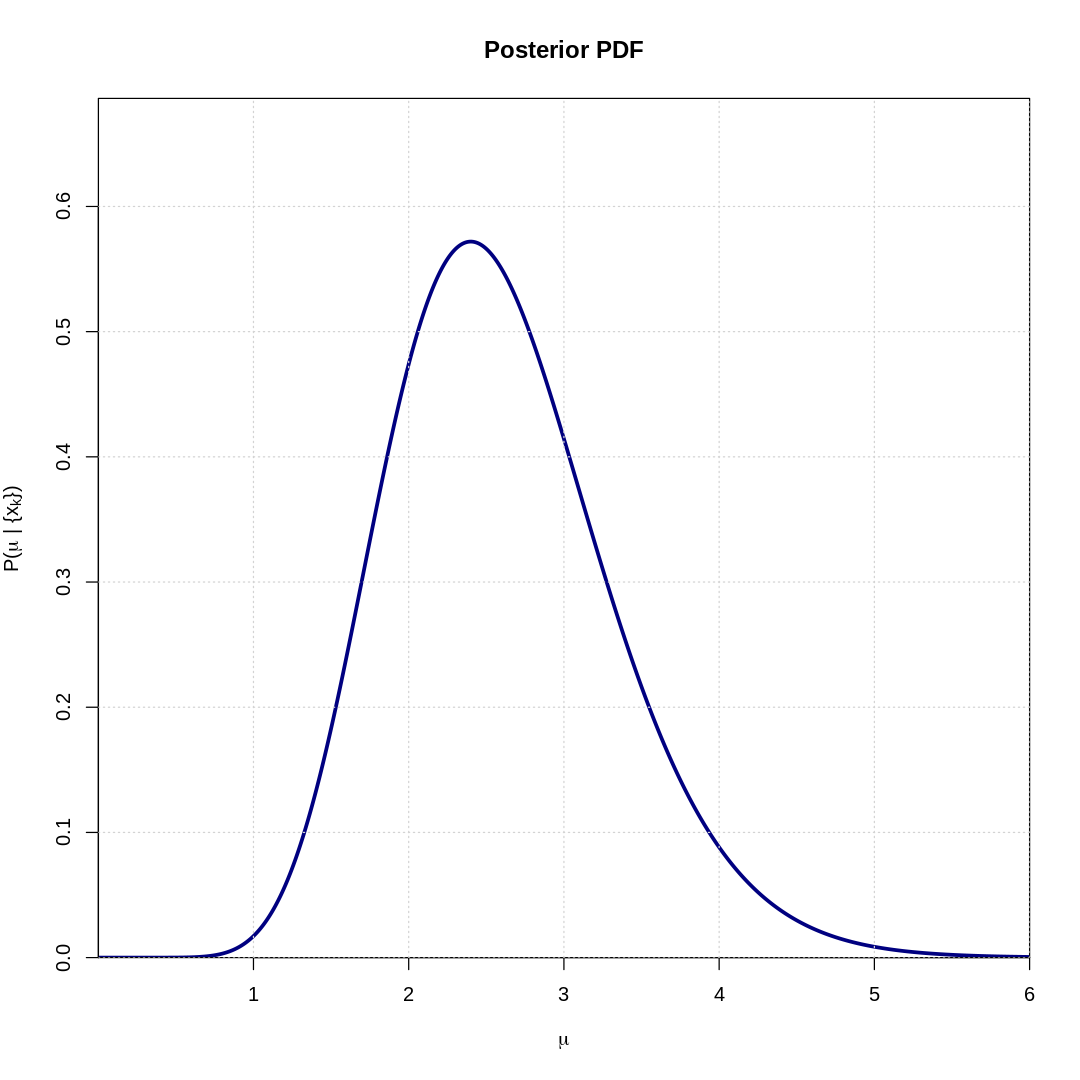

In [63]:
options(repr.plot.width=9, repr.plot.height=9)
plot(mu, p.post.n.u, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd = 3, 
     ylim=c(0,1.2*max(p.post.n.u)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {x"["k"],"})")),
     main='Posterior PDF')
grid()

**Compute mean, median and variance numerically**

In [64]:
median.u <- compute.median(mu, p.post.n.u)
mean.u   <- compute.mean  (mu, p.post.n.u)
var.u    <- compute.var   (mu, p.post.n.u)

cat("Median   (uniform prior):", median.u, "\n")
cat("Mean     (uniform prior):", mean.u,   "\n")
cat("Variance (uniform prior):", var.u)

Median   (uniform prior): 2.532997 
Mean     (uniform prior): 2.599378 
Variance (uniform prior): 0.5177596

**Compute mean and variance analytically: the posterior has the form of a $\text{Gamma}(\alpha=\sum x_j +1, \lambda=n)$.**

In [65]:
cat("Mean     (uniform prior, analytic):", (sum(data)+1)/length(data), "\n")
cat("Variance (uniform prior, analytic):", (sum(data)+1)/length(data)^2)

Mean     (uniform prior, analytic): 2.6 
Variance (uniform prior, analytic): 0.52

### 1.2. - Results assuming a Jeffrey's prior for $\mu$ <a class="anchor" id="Ex1.2."></a>

In [66]:
n.p <- 6001 # number of points in the plots
mu  <- seq(0.001, 6, length.out=n.p)
Dmu <- mu[2] - mu[1]

**Compute likelihood**

In [67]:
p.like <- rep(1, n.p)
for (i in 1:length(data)) {
    p.like <- p.like * dpois(x=data[i], lambda=mu)
}

In [68]:
p.post.j   <- p.like / sqrt(mu)
p.post.n.j <- p.post.j / (Dmu*sum(p.post.j))

**Plot posterior PDF**

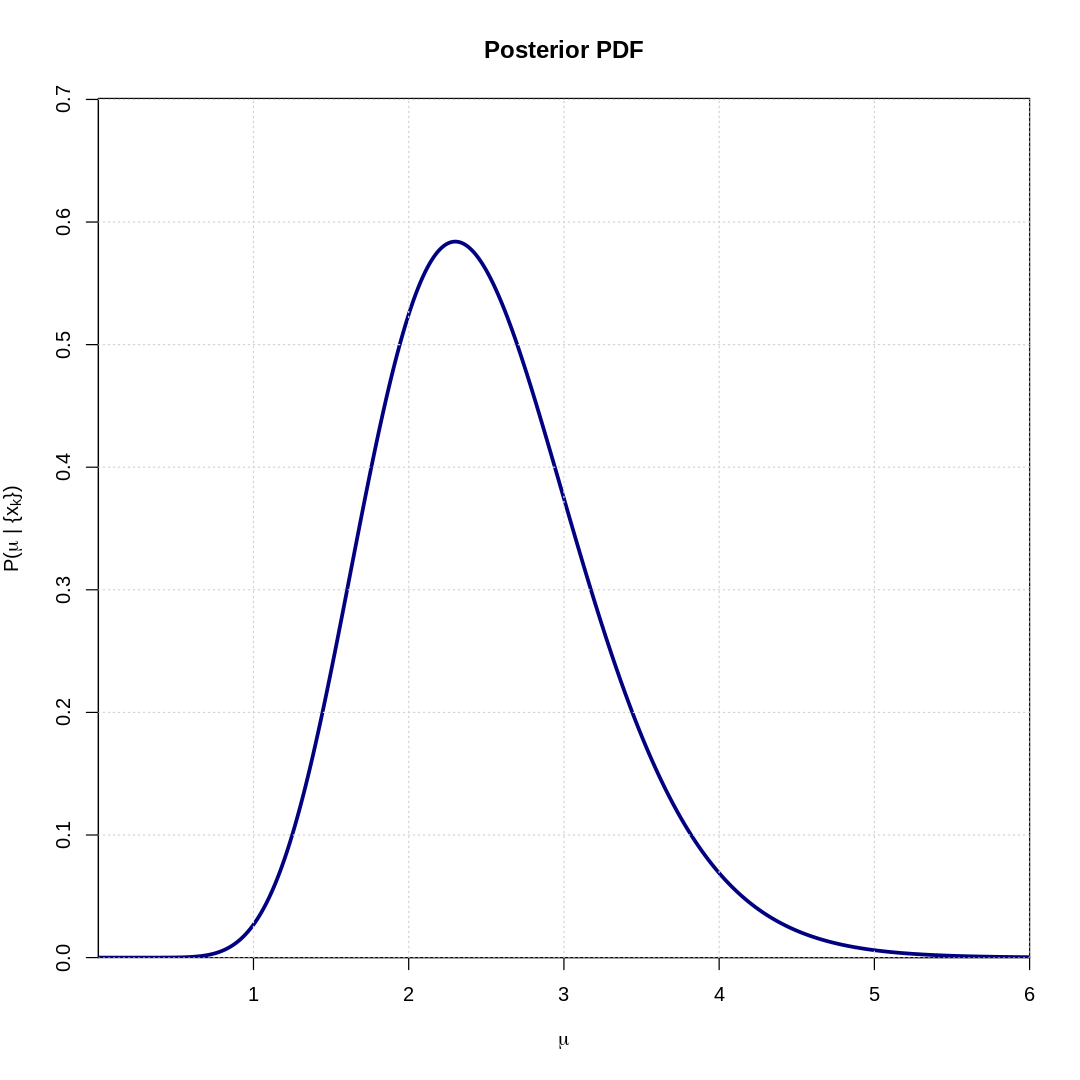

In [69]:
options(repr.plot.width=9, repr.plot.height=9)
plot(mu, p.post.n.j, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd = 3, 
     ylim=c(0,1.2*max(p.post.n.j)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {x"["k"],"})")),
     main='Posterior PDF')
grid()

**Compute mean, median and variance numerically**

In [70]:
median.j <- compute.median(mu, p.post.n.j)
mean.j   <- compute.mean  (mu, p.post.n.j)
var.j    <- compute.var   (mu, p.post.n.j)

cat("Median   (Jeffrey's prior):", median.j, "\n")
cat("Mean     (Jeffrey's prior):", mean.j,   "\n")
cat("Variance (Jeffrey's prior):", var.j)

Median   (Jeffrey's prior): 2.433068 
Mean     (Jeffrey's prior): 2.499602 
Variance (Jeffrey's prior): 0.4985287

**Compute mean and variance analytically: the posterior has the form of a $\text{Gamma}(\alpha=\sum x_j +\frac{1}{2}, \lambda=n)$.**

In [71]:
cat("Mean     (Jeffrey's prior, analytic):", (sum(data)+0.5)/length(data), "\n")
cat("Variance (Jeffrey's prior, analytic):", (sum(data)+0.5)/length(data)^2)

Mean     (Jeffrey's prior, analytic): 2.5 
Variance (Jeffrey's prior, analytic): 0.5

**Comparison of the two posteriors**

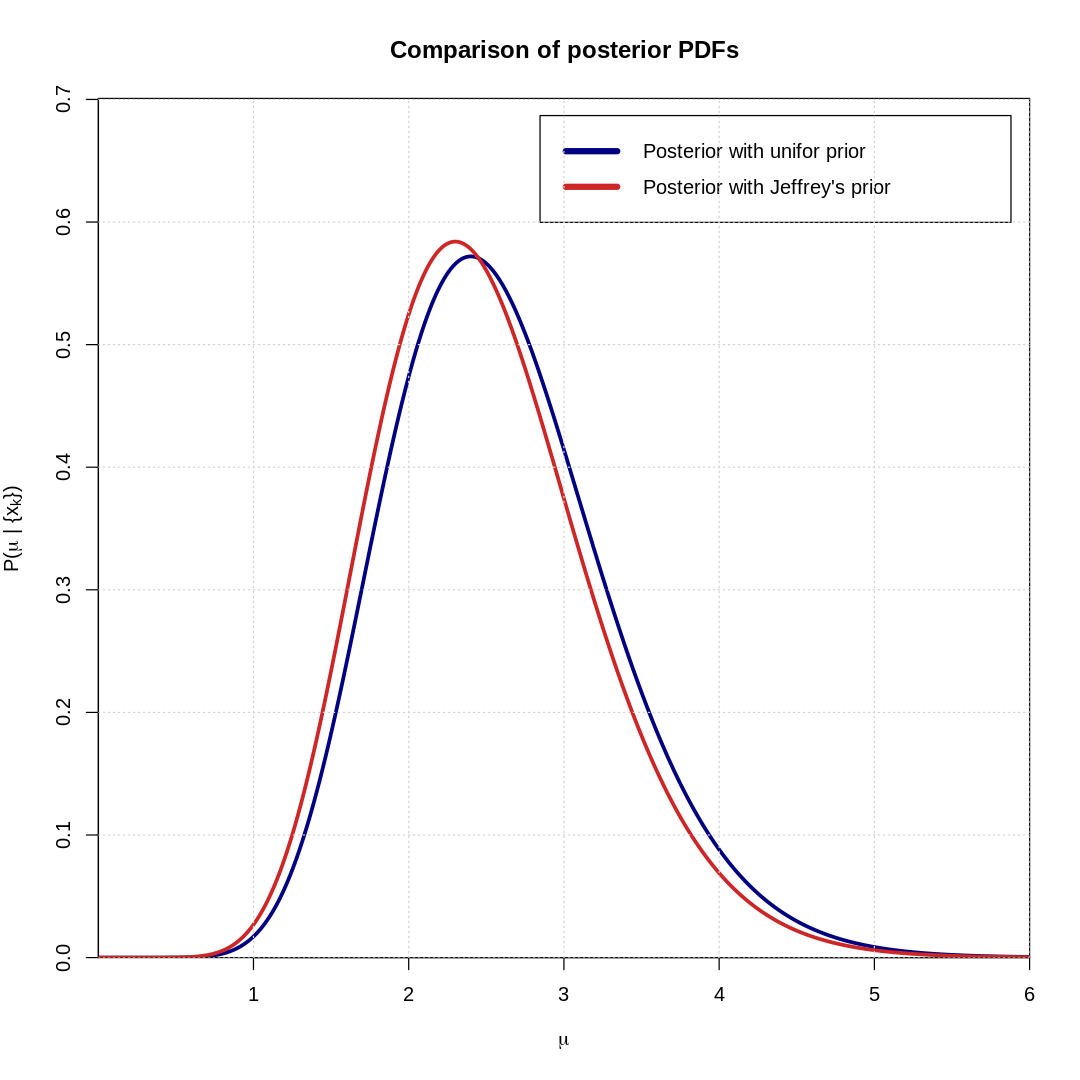

In [74]:
options(repr.plot.width=9, repr.plot.height=9)
plot(mu, p.post.n.u, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd = 3, 
     ylim=c(0,1.2*max(max(p.post.n.u), max(p.post.n.j))), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {x"["k"],"})")),
     main='Comparison of posterior PDFs')
lines(mu, p.post.n.j, col='firebrick3',lwd=3, lty=1)

legend("topright",
       inset=0.02, 
       legend=c("Posterior with unifor prior","Posterior with Jeffrey's prior"),
       col=c("navy", "firebrick3"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd=5)
grid()

### 1.3. - 95% credibility interval and comparison with normal approximation for the posterior distribution <a class="anchor" id="Ex1.3."></a>

**Compute most probable values for both priors**

In [80]:
mu.m.u <- get.x.dmax(mu, p.post.n.u)
mu.m.j <- get.x.dmax(mu, p.post.n.j)

In [81]:
cat("Most probable value (flat)   :", round(mu.m.u,4), "\n")
cat("Most probable value (Jeffrey):", round(mu.m.j,4))

Most probable value (flat)   : 2.4 
Most probable value (Jeffrey): 2.3

**Compute bounds of 95% credibility interval for both priors**

In [82]:
mu.c.u <- get.c.int(mu, p.post.n.u, cl=0.95)
mu.c.j <- get.c.int(mu, p.post.n.j, cl=0.95)

In [83]:
cat("95% C.I. (flat)   : [", round(mu.c.u[1],4), ", ", round(mu.c.u[2],4), "]", "\n", sep="")
cat("95% C.I. (Jeffrey): [", round(mu.c.j[1],4), ", ", round(mu.c.j[2],4), "]",       sep="")

95% C.I. (flat)   : [1.3839, 4.1891]
95% C.I. (Jeffrey): [1.3115, 4.0625]

**Compare the results**

In [84]:
# Code for polygon function
xs.u <- seq(mu.c.u[1], mu.c.u[2], length.out=length(mu))
xs.j <- seq(mu.c.j[1], mu.c.j[2], length.out=length(mu))

p.like.u <- rep(1, length(mu))
p.like.j <- rep(1, length(mu))
for (i in 1:length(data)) { p.like.u <- p.like.u * dpois(x=data[i], lambda=xs.u) }
for (i in 1:length(data)) { p.like.j <- p.like.j * dpois(x=data[i], lambda=xs.j) }

ys.u <- p.like.u
ys.j <- p.like.j / sqrt(xs.j)

Dxs.u <- xs.u[2] - xs.u[1]
Dxs.j <- xs.j[2] - xs.j[1]

ys.u <- ys.u / (Dmu*sum(p.post.u))
ys.j <- ys.j / (Dmu*sum(p.post.j))

xs.u <- c(mu.c.u[1], xs.u, mu.c.u[2])
xs.j <- c(mu.c.j[1], xs.j, mu.c.j[2])

ys.u <- c(0, ys.u, 0)
ys.j <- c(0, ys.j, 0)

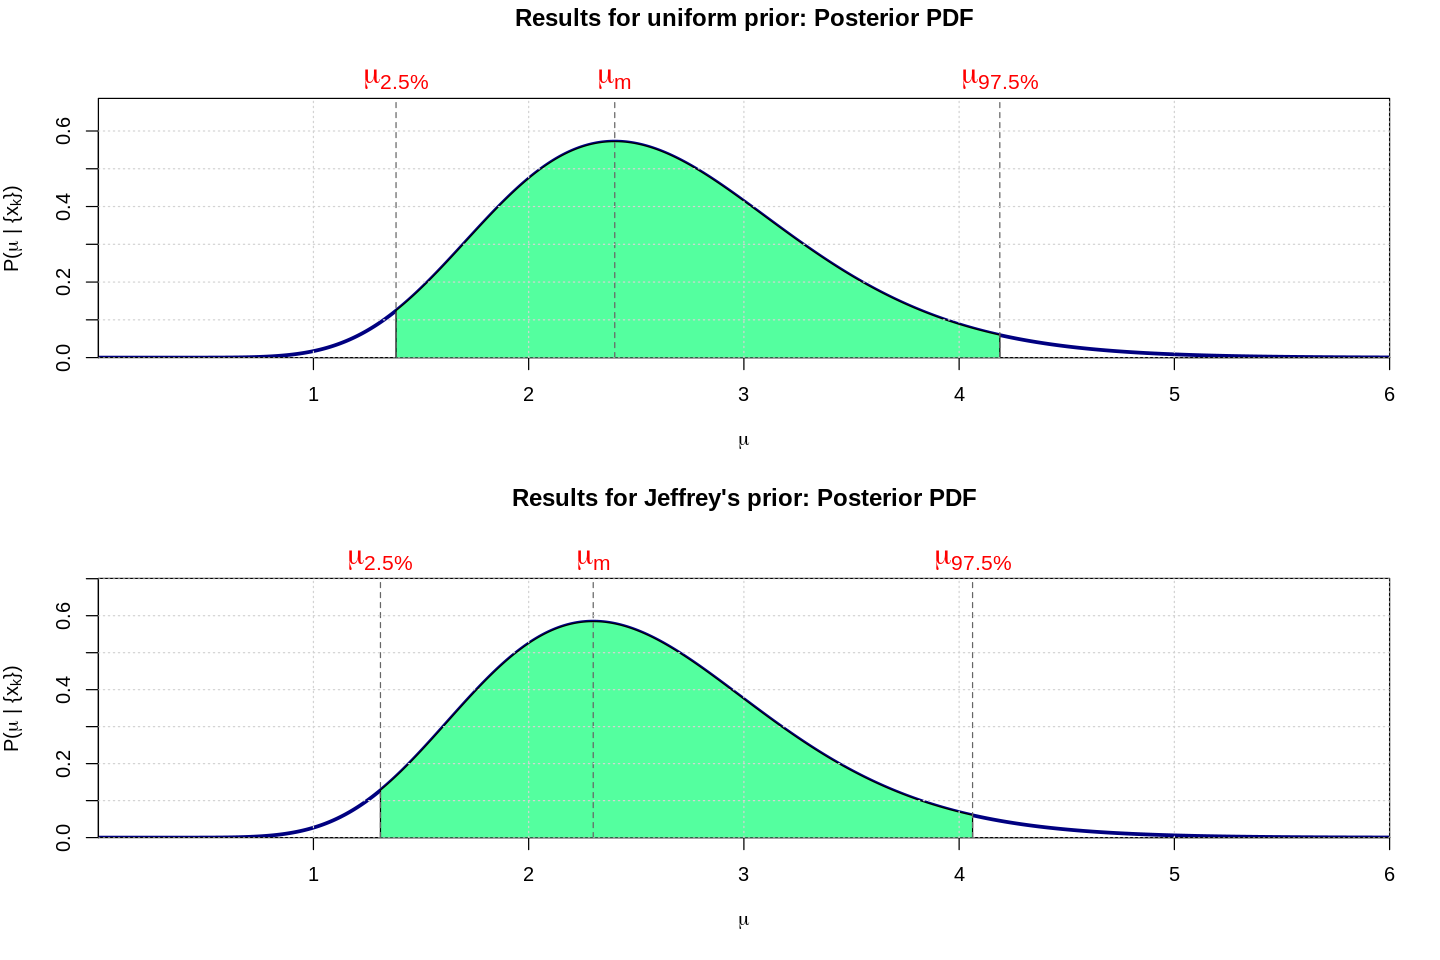

In [89]:
par(mfrow=c(2, 1))
options(repr.plot.width=12, repr.plot.height=8)

plot(mu, p.post.n.u, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     ylim=c(0,1.2*max(p.post.n.u)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {x"["k"],"})")))
polygon(x=xs.u, y=ys.u, col='seagreen1')
abline(v=mu.m.u,    col="grey40", lty=2)
abline(v=mu.c.u[1], col="grey40", lty=2)
abline(v=mu.c.u[2], col="grey40", lty=2)
text(mu.m.u,    par("usr")[4] + 0.1, labels=expression(mu["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.u[1], par("usr")[4] + 0.1, labels=expression(mu["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.u[2], par("usr")[4] + 0.1, labels=expression(mu["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)
title("Results for uniform prior: Posterior PDF", line=3)
grid()

plot(mu, p.post.n.j, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     ylim=c(0,1.2*max(p.post.n.j)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {x"["k"],"})")))
polygon(x=xs.j, y=ys.j, col='seagreen1')
abline(v=mu.m.j,    col="grey40", lty=2)
abline(v=mu.c.j[1], col="grey40", lty=2)
abline(v=mu.c.j[2], col="grey40", lty=2)
text(mu.m.j,    par("usr")[4] + 0.1, labels=expression(mu["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.j[1], par("usr")[4] + 0.1, labels=expression(mu["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.j[2], par("usr")[4] + 0.1, labels=expression(mu["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)
title("Results for Jeffrey\'s prior: Posterior PDF", line=3)
grid()

**Comparison of results from uniform prior with normal approximation**

In [90]:
p.norm.u <- dnorm(mu, mean=mean.u, sd=sqrt(var.u))

In [97]:
mu.m.norm.u <- get.x.dmax(mu, p.norm.u)
mu.c.norm.u <- get.c.int(mu, p.norm.u, cl=0.95)

In [98]:
cat("Approximated most probable value:", round(mu.m.norm.u,4))

Approximated most probable value: 2.5994 



In [99]:
cat("Approximated 95% C.I.: [", round(mu.c.norm.u[1],4), ", ", round(mu.c.norm.u[2],4), "]", sep="")

Approximated 95% C.I.: [1.1904, 4.0111]

In [100]:
# Code for polygon function
xs.norm.u  <- seq(mu.c.norm.u[1], mu.c.norm.u[2], length.out=length(mu))
ys.norm.u  <- dnorm(xs.norm.u, mean=mean.u, sd=sqrt(var.u))
Dxs.norm.u <- xs.norm.u[2] - xs.norm.u[1]
xs.norm.u  <- c(mu.c.norm.u[1], xs.norm.u, mu.c.norm.u[2])
ys.norm.u  <- c(0, ys.norm.u, 0)

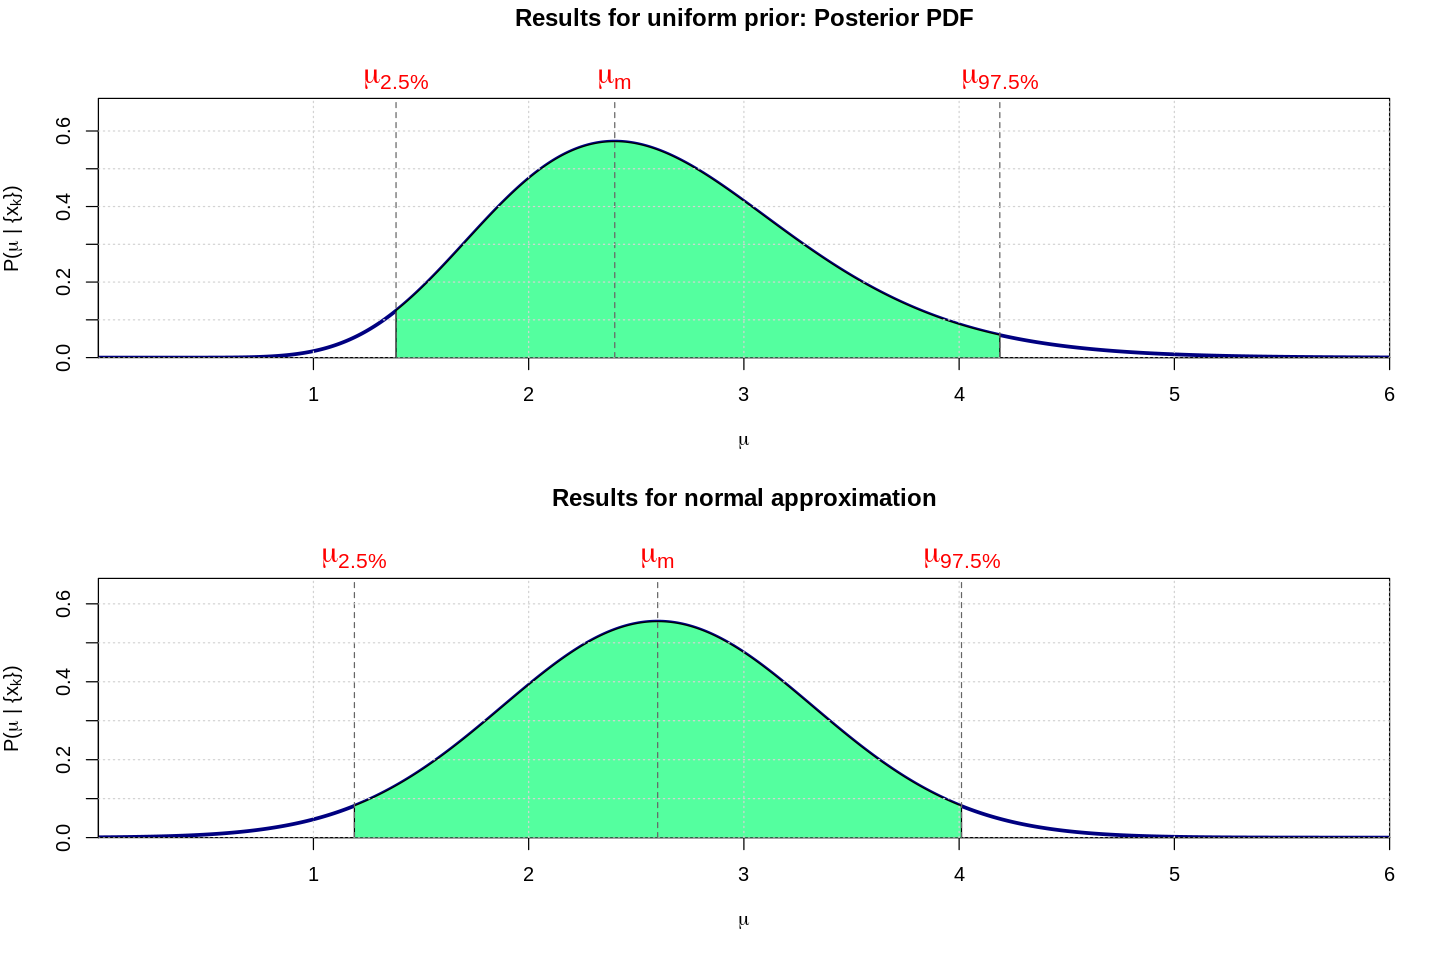

In [107]:
par(mfrow=c(2, 1))
options(repr.plot.width=12, repr.plot.height=8)

plot(mu, p.post.n.u, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     ylim=c(0,1.2*max(p.post.n.u)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {x"["k"],"})")))
polygon(x=xs.u, y=ys.u, col='seagreen1')
abline(v=mu.m.u,    col="grey40", lty=2)
abline(v=mu.c.u[1], col="grey40", lty=2)
abline(v=mu.c.u[2], col="grey40", lty=2)
text(mu.m.u,    par("usr")[4] + 0.1, labels=expression(mu["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.u[1], par("usr")[4] + 0.1, labels=expression(mu["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.u[2], par("usr")[4] + 0.1, labels=expression(mu["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)
title("Results for uniform prior: Posterior PDF", line=3)
grid()

plot(mu, p.norm.u, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     ylim=c(0,1.2*max(p.norm.u)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {x"["k"],"})")))
polygon(x=xs.norm.u, y=ys.norm.u, col='seagreen1')
abline(v=mu.m.norm.u,    col="grey40", lty=2)
abline(v=mu.c.norm.u[1], col="grey40", lty=2)
abline(v=mu.c.norm.u[2], col="grey40", lty=2)
text(mu.m.norm.u,    par("usr")[4] + 0.1, labels=expression(mu["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.norm.u[1], par("usr")[4] + 0.1, labels=expression(mu["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.norm.u[2], par("usr")[4] + 0.1, labels=expression(mu["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)
title("Results for normal approximation", line=3)
grid()

**Comparison of results from Jeffrey's prior with normal approximation**

In [108]:
p.norm.j <- dnorm(mu, mean=mean.j, sd=sqrt(var.j))

In [109]:
mu.m.norm.j <- get.x.dmax(mu, p.norm.j)
mu.c.norm.j <- get.c.int(mu, p.norm.j, cl=0.95)

In [110]:
cat("Approximated most probable value:", round(mu.m.norm.j,4))

Approximated most probable value: 2.4996

In [111]:
cat("Approximated 95% C.I.: [", round(mu.c.norm.j[1],4), ", ", round(mu.c.norm.j[2],4), "]", sep="")

Approximated 95% C.I.: [1.1177, 3.8854]

In [112]:
# Code for polygon function
xs.norm.j  <- seq(mu.c.norm.j[1], mu.c.norm.j[2], length.out=length(mu))
ys.norm.j  <- dnorm(xs.norm.j, mean=mean.j, sd=sqrt(var.j))
Dxs.norm.j <- xs.norm.j[2] - xs.norm.j[1]
xs.norm.j  <- c(mu.c.norm.j[1], xs.norm.j, mu.c.norm.j[2])
ys.norm.j  <- c(0, ys.norm.j, 0)

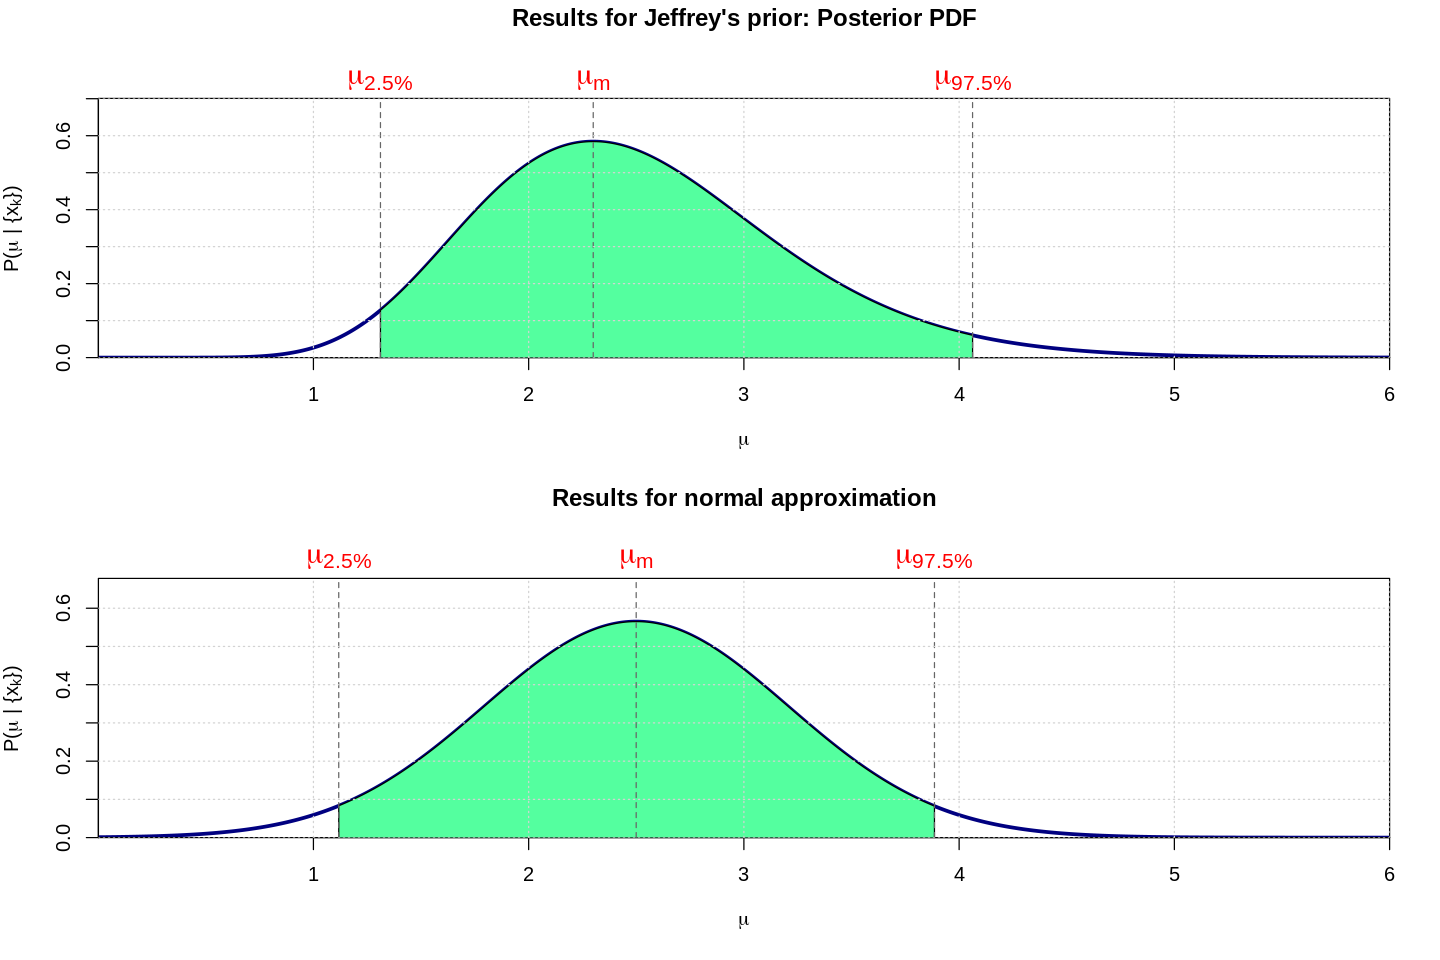

In [113]:
par(mfrow=c(2, 1))
options(repr.plot.width=12, repr.plot.height=8)

plot(mu, p.post.n.j, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     ylim=c(0,1.2*max(p.post.n.j)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {x"["k"],"})")))
polygon(x=xs.j, y=ys.j, col='seagreen1')
abline(v=mu.m.j,    col="grey40", lty=2)
abline(v=mu.c.j[1], col="grey40", lty=2)
abline(v=mu.c.j[2], col="grey40", lty=2)
text(mu.m.j,    par("usr")[4] + 0.1, labels=expression(mu["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.j[1], par("usr")[4] + 0.1, labels=expression(mu["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.j[2], par("usr")[4] + 0.1, labels=expression(mu["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)
title("Results for Jeffrey\'s prior: Posterior PDF", line=3)
grid()

plot(mu, p.norm.j, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     ylim=c(0,1.2*max(p.norm.j)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {x"["k"],"})")))
polygon(x=xs.norm.j, y=ys.norm.j, col='seagreen1')
abline(v=mu.m.norm.j,    col="grey40", lty=2)
abline(v=mu.c.norm.j[1], col="grey40", lty=2)
abline(v=mu.c.norm.j[2], col="grey40", lty=2)
text(mu.m.norm.j,    par("usr")[4] + 0.1, labels=expression(mu["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.norm.j[1], par("usr")[4] + 0.1, labels=expression(mu["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.norm.j[2], par("usr")[4] + 0.1, labels=expression(mu["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)
title("Results for normal approximation", line=3)
grid()

***
## Exercise 2 <a class="anchor" id="Ex2."></a>
* [Index](#ExI)
***

**Starting from the first version of the lighthouse problem, in which $\beta$ is known, we extend it in the case $\beta$ is not known. The first step is to add a prior also for $\beta$:**

$$
p(\alpha, \beta | M) \propto p(\alpha | M) \cdot p(\beta | M)
$$

**where the factorization is possible if we (reasonably) assume $\alpha \perp \beta$. So, we get the following posterior:**

$$
p(\alpha, \beta | \{x_k\}, M) \propto p(\{x_k\} | \alpha, \beta, M) p(\alpha | M) p(\beta | M)
$$

**Let's define the bounds in which $\alpha$ and $\beta$ range.**

In [114]:
x_min <- -50 
x_max <- +50
y_min <-   0
y_max <- 100

In [115]:
n.p <- 201

In [116]:
alpha <- seq(x_min, x_max, length.out=n.p)
beta  <- seq(y_min, y_max, length.out=n.p)
Da    <- alpha[2] - alpha[1]
Db    <-  beta[2] -  beta[1]
Dab   <- Da * Db

**Impose as true value of $\alpha$ and $\beta$ respectively:**

$$
\boxed{
\alpha^* = 20\\
\beta^*  = 50
}
$$

In [121]:
alpha.t <- 20
beta.t  <- 50

**Let's define some useful functions for log prior, likelihood and posterior distributions.**

In [122]:
f.log.prior <- function(alpha, beta) {
    logPrior <- log(dunif(alpha, min=x_min, max=x_max)) + log(dunif(beta, min=y_min, max=y_max))
    
    return(logPrior)
}

In [123]:
f.log.like <- function(data, alpha, beta) {
    logL <- rep(0, length(alpha))
    for (x in data) {
        logL <- logL + log( (beta/pi) / (beta^2 + (x - alpha)^2) )
    }
    
    return(logL)
}

In [124]:
f.log.post <- function(alpha, beta, data) {
    logPost <- f.log.like(data, alpha, beta) + f.log.prior(alpha, beta)
    
    return(logPost)
}

**In the cell below, the following routine is applied for every dataset with a different number of data samples:**

* **create a data set imposing as true value of $\alpha$ and $\beta$ respectively $\alpha^*$ and $\beta^*$;**
* **compute log posterior and normalize;**
* **plot of the posterior distribution depending on $\alpha$ and $\beta$.**

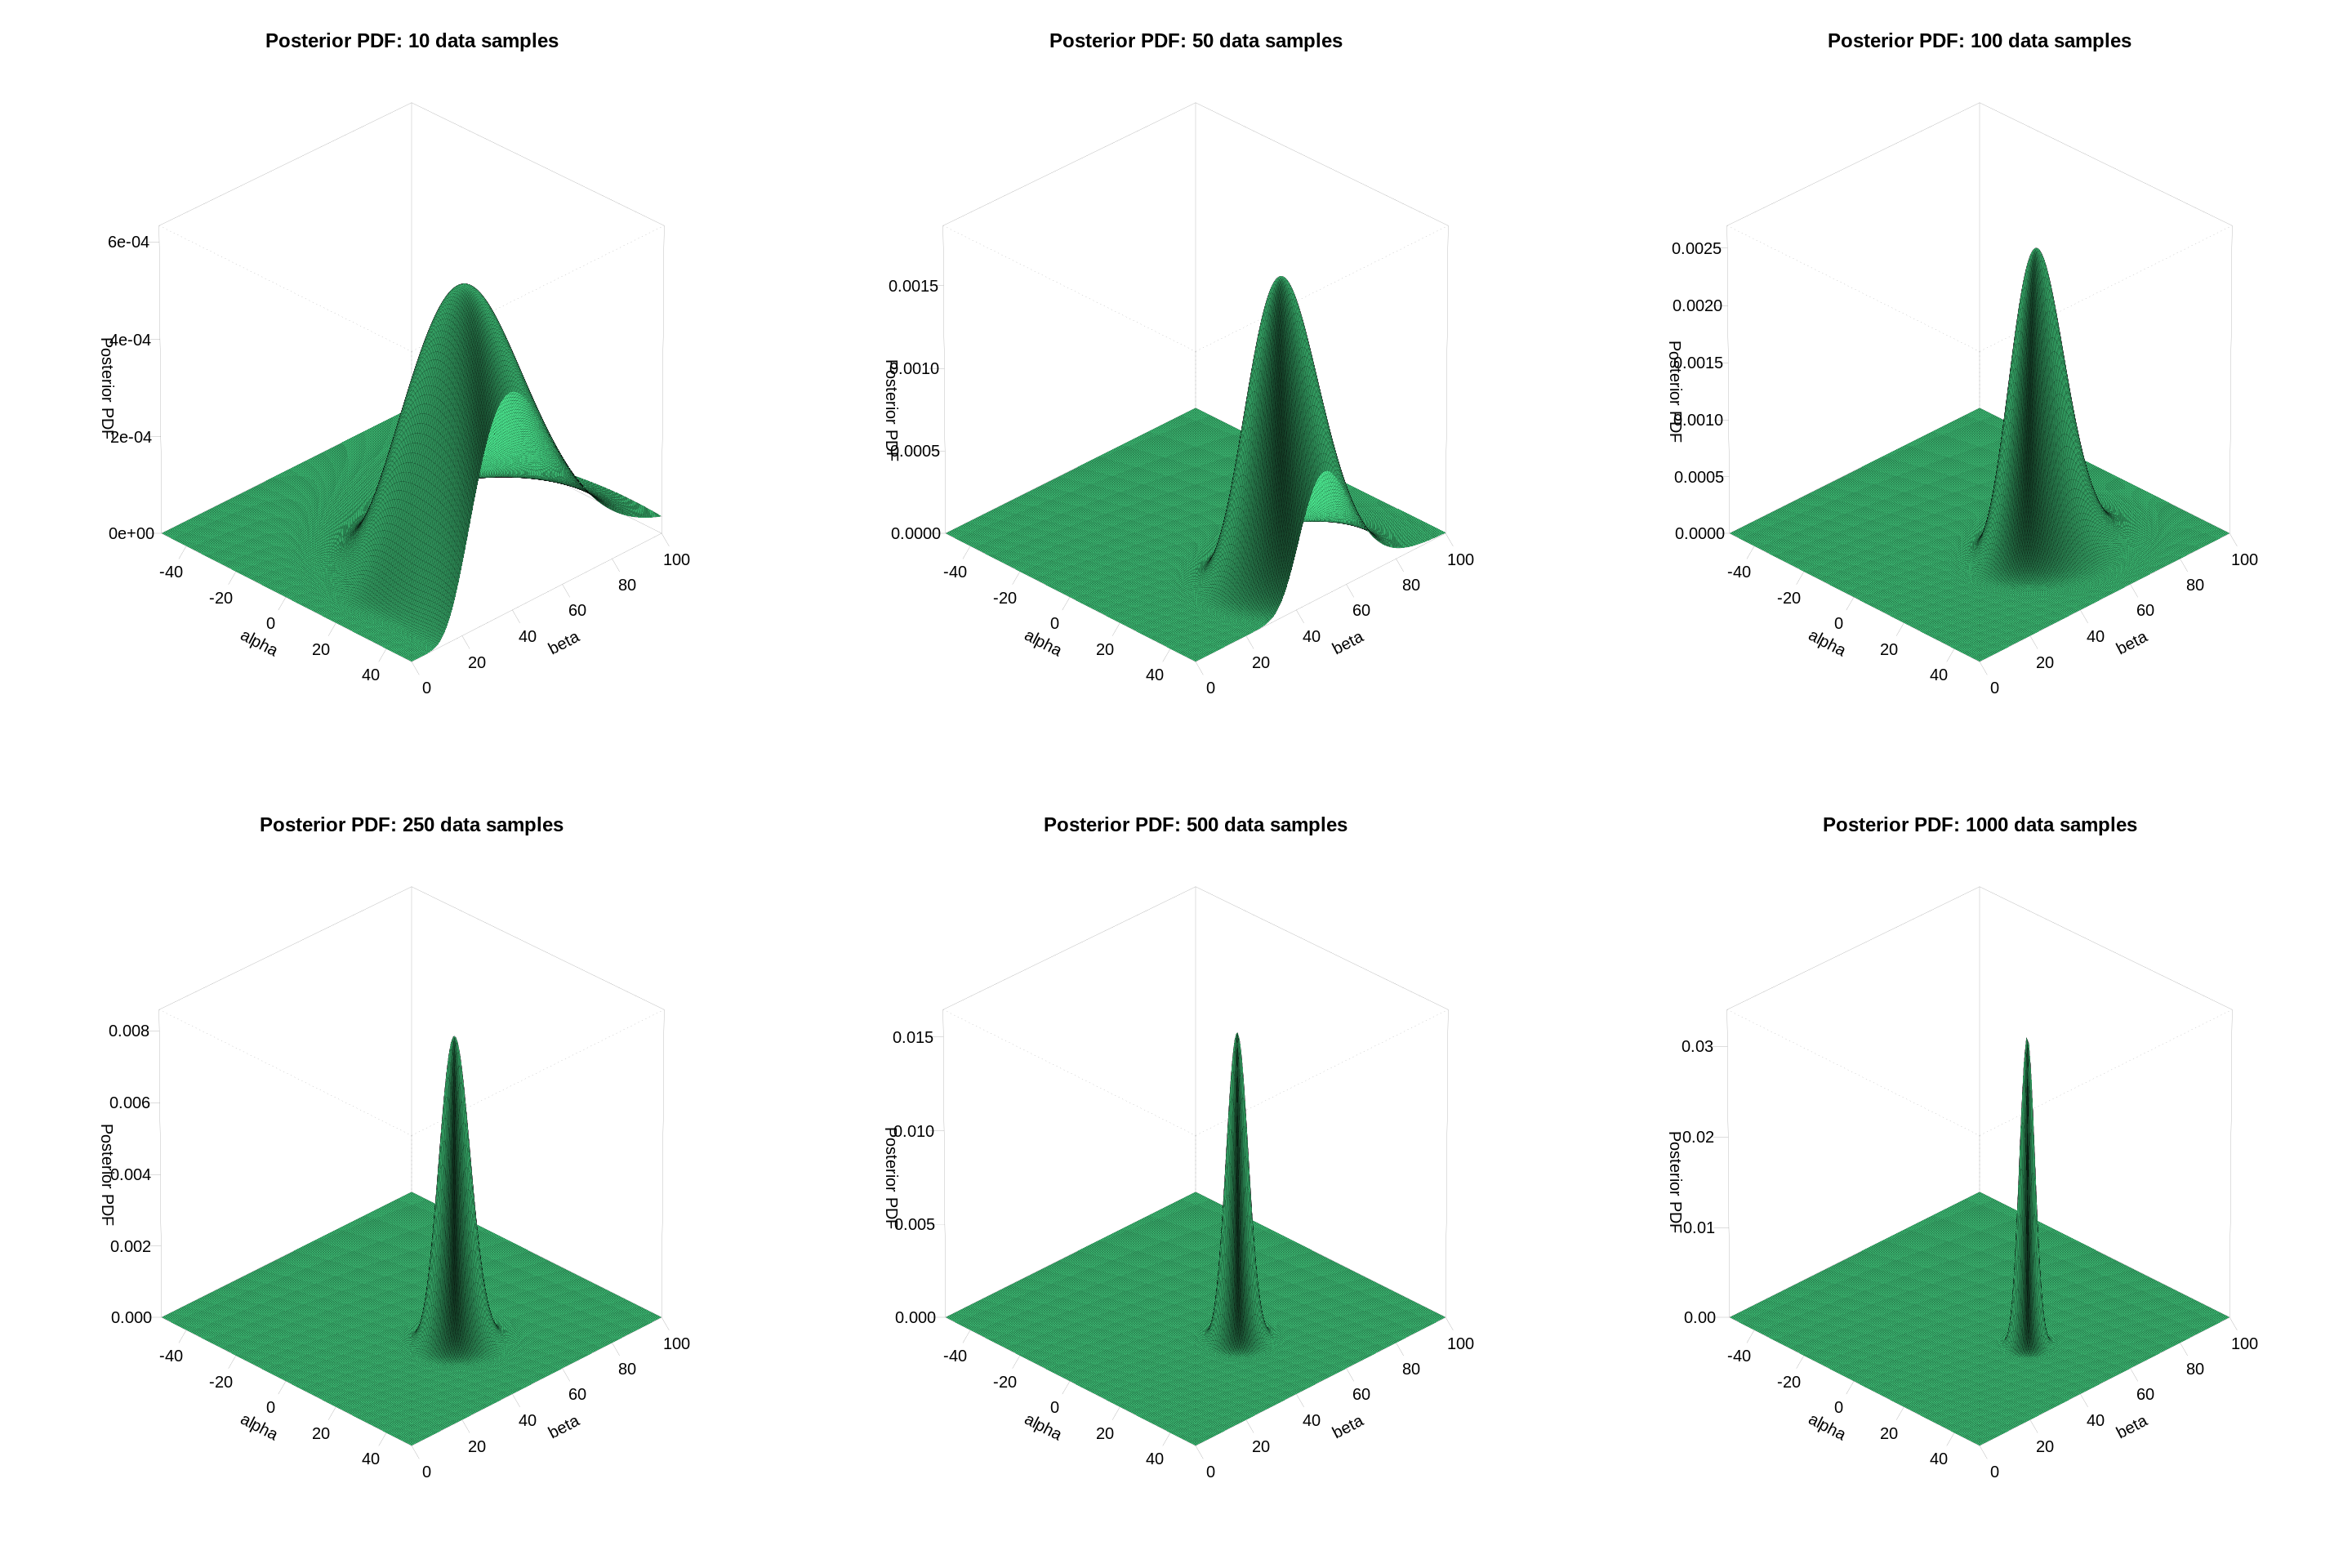

In [132]:
ns.data <- c(10, 50, 100, 250, 500, 1000)

par(mfrow=c(2, 3), cex=1)
options(repr.plot.width=24, repr.plot.height=16)
for (n.data in ns.data) {
    ################################################################
    set.seed(1231629)
    theta.k <- runif(n.data, min=-pi/2, max=+pi/2)
    data    <- beta.t * tan(theta.k) + alpha.t
    ################################################################
    
    ################################################################
    p.log.post <- outer(alpha, beta, Vectorize(function(alpha,beta) f.log.post(alpha, beta, data)))
    p.log.post <- p.log.post - max(p.log.post) #to avoid under/overflows
    p.post.n   <- exp(p.log.post) / (Dab * sum(exp(p.log.post)))
    ################################################################

    ################################################################
    persp(alpha, beta , p.post.n,
          xlab=bquote(alpha),
          ylab=bquote(beta),
          zlab="Posterior PDF", 
          main=sprintf("Posterior PDF: %d data samples",n.data),
          cex=0.7, lwd=0.1, ticktype="detailed", col="seagreen2",
          xlim=c(x_min,x_max),
          ylim=c(y_min,y_max),
          theta=45, phi=30, d=50.0, shade=0.25)
    ################################################################
}

**Now, let's marginalize for $\alpha$ and for $\beta$.**

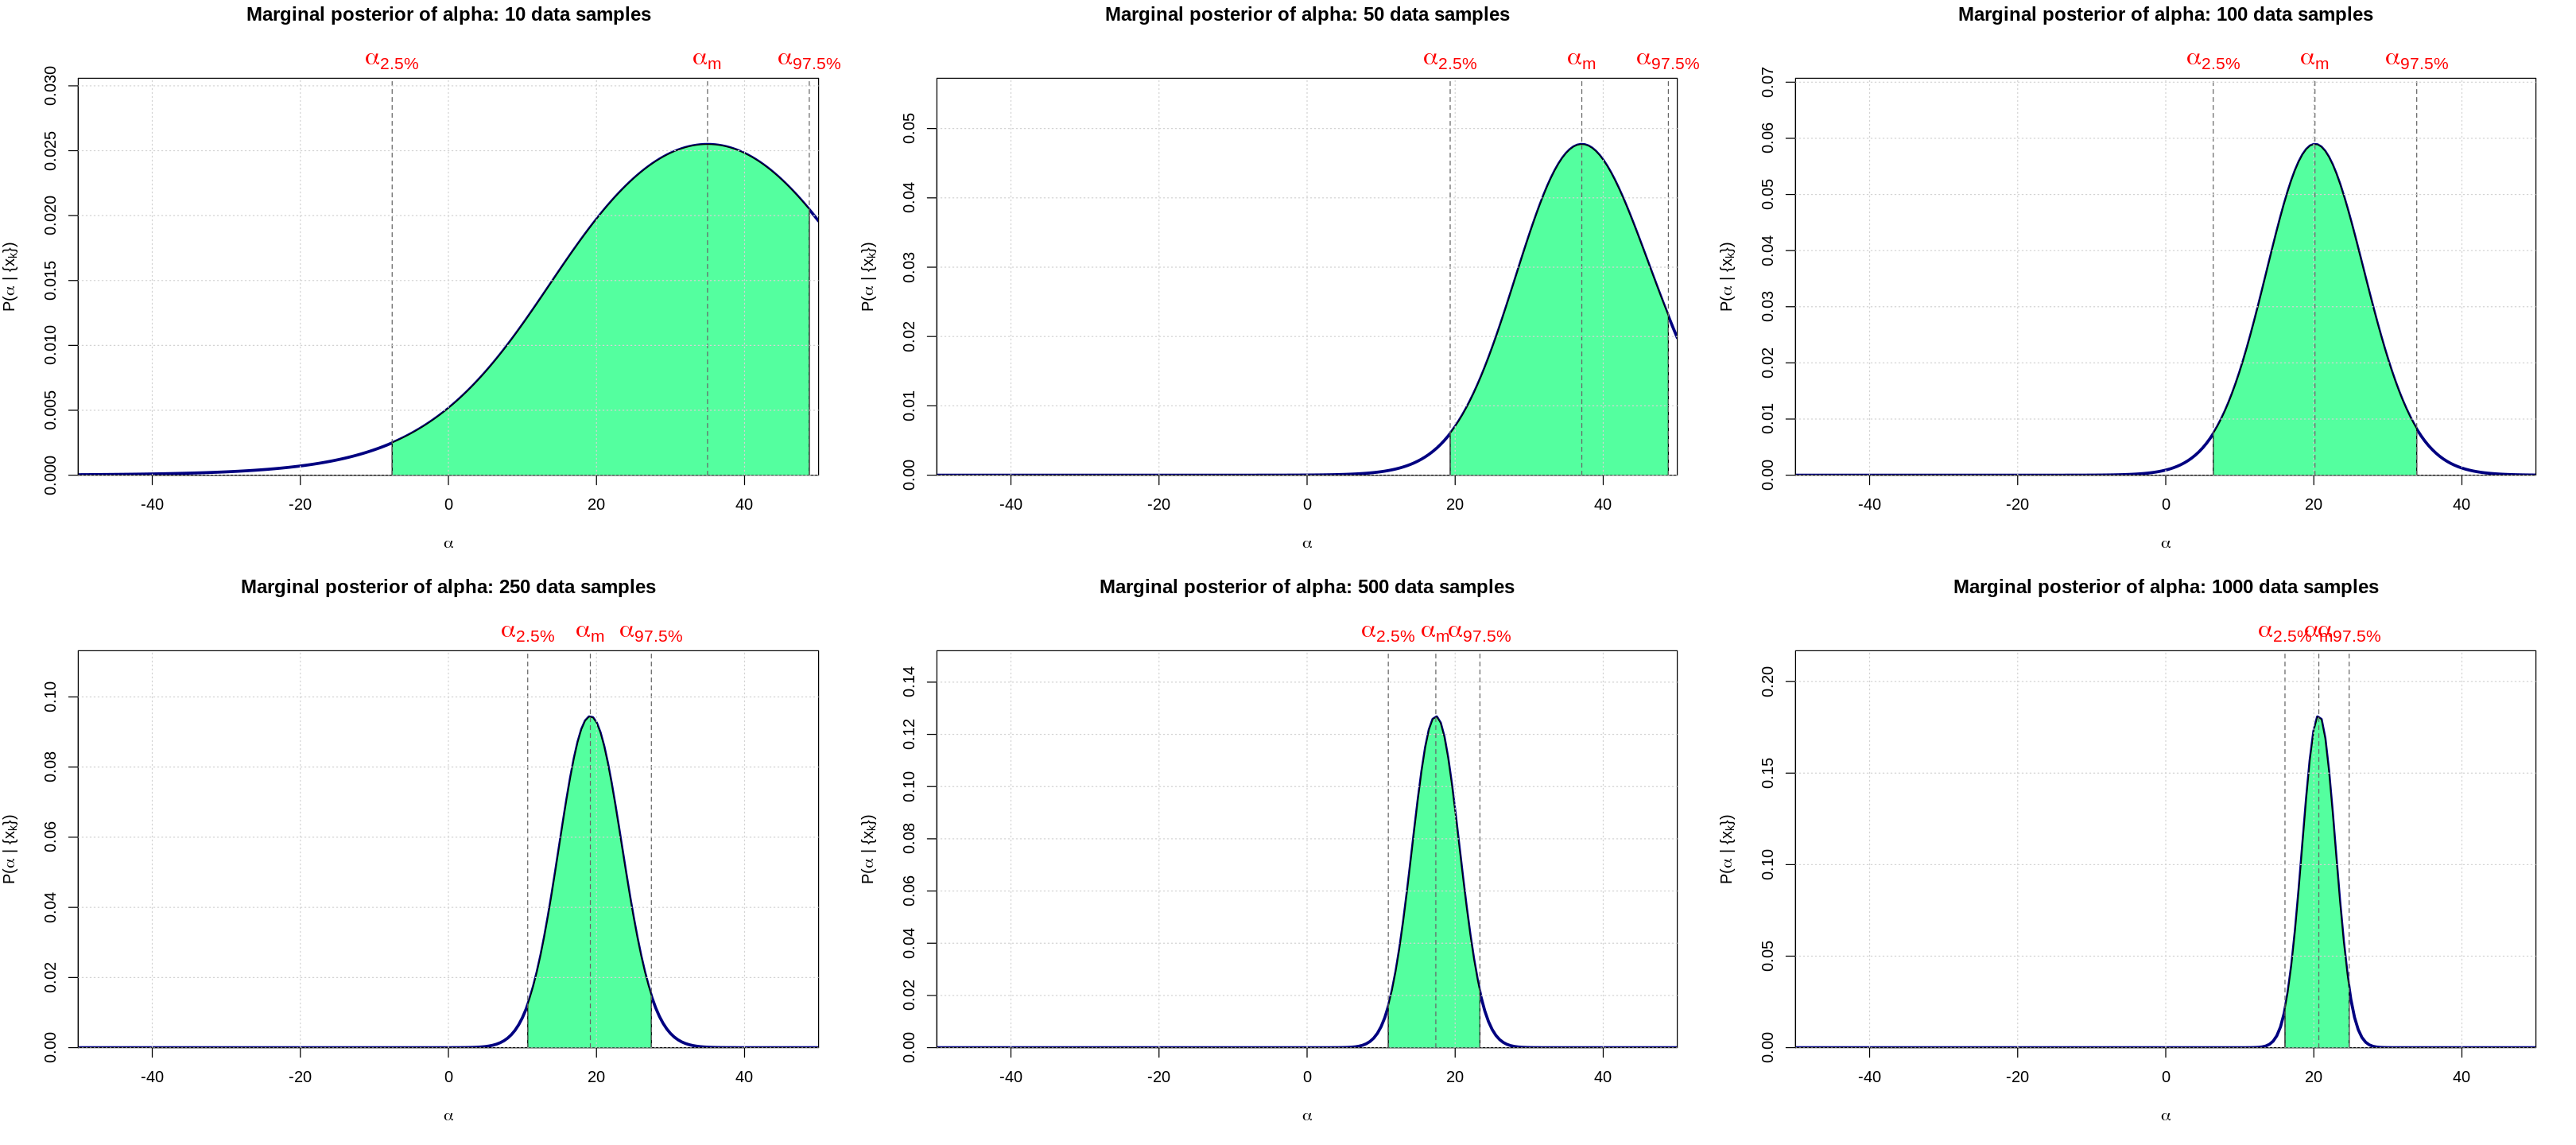

In [144]:
par(mfrow=c(2, 3), cex=1)
options(repr.plot.width=27, repr.plot.height=12)
for (n.data in ns.data) {
    ################################################################
    set.seed(1231629)
    theta.k <- runif(n.data, min=-pi/2, max=+pi/2)
    data    <- beta.t * tan(theta.k) + alpha.t
    ################################################################
    
    ################################################################
    p.log.post <- outer(alpha, beta, Vectorize(function(alpha,beta) f.log.post(alpha, beta, data)))
    p.constant <- max(p.log.post)
    p.log.post <- p.log.post - p.constant #to avoid under/overflows
    p.post.n   <- exp(p.log.post) / (Dab * sum(exp(p.log.post)))
    ################################################################

    ################################################################
    m.a.p.post.n <- apply(p.post.n, 1, sum)
    m.a.p.post.n <- m.a.p.post.n / (Da * sum(m.a.p.post.n))
    ################################################################
    
    ################################################################
    m.m.a <- get.x.dmax(alpha, m.a.p.post.n)
    c.m.a <- get.c.int (alpha, m.a.p.post.n, cl=0.95)
    ################################################################
                                               
    ################################################################
    # Code for polygon function
    xs.m.a   <- alpha[which(alpha > c.m.a[1] & alpha < c.m.a[2])]
    ys.m.a   <- m.a.p.post.n[which(alpha > c.m.a[1] & alpha < c.m.a[2])]
    xs.m.a   <- c(c.m.a[1], c.m.a[1], xs.m.a, c.m.a[2], c.m.a[2])
    ys.m.a.b <- outer(c.m.a, beta, function(alpha,beta) f.log.post(alpha, beta, data))
    ys.m.a.b <- ys.m.a.b - p.constant
    ys.m.a.b <- exp(ys.m.a.b) / (Dab * sum(exp(p.log.post)))
    ys.m.a.b <- apply(ys.m.a.b, 1, sum)
    ys.m.a.b <- ys.m.a.b / (Da * sum(apply(p.post.n, 1, sum)))
    ys.m.a   <- c(0, ys.m.a.b[1], ys.m.a, ys.m.a.b[2], 0)
    ################################################################
    
    ################################################################
    plot(alpha, m.a.p.post.n,
         xaxs='i', yaxs='i', col='navy', 
         type='l', lty=1, lwd = 3, 
         ylim=c(0,1.2*max(m.a.p.post.n)), 
         xlab=expression(alpha),
         ylab=expression(paste("P(",alpha," | {x"["k"],"})")))
    polygon(x=xs.m.a, y=ys.m.a, col='seagreen1')
    abline(v=m.m.a,    col="grey40", lty=2)
    abline(v=c.m.a[1], col="grey40", lty=2)
    abline(v=c.m.a[2], col="grey40", lty=2)
    text(m.m.a,    1.08*par("usr")[4], labels=expression(alpha["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
    text(c.m.a[1], 1.08*par("usr")[4], labels=expression(alpha["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
    text(c.m.a[2], 1.08*par("usr")[4], labels=expression(alpha["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)
    title(sprintf("Marginal posterior of alpha: %d data samples", n.data), line=3)
    grid()
    ################################################################
}

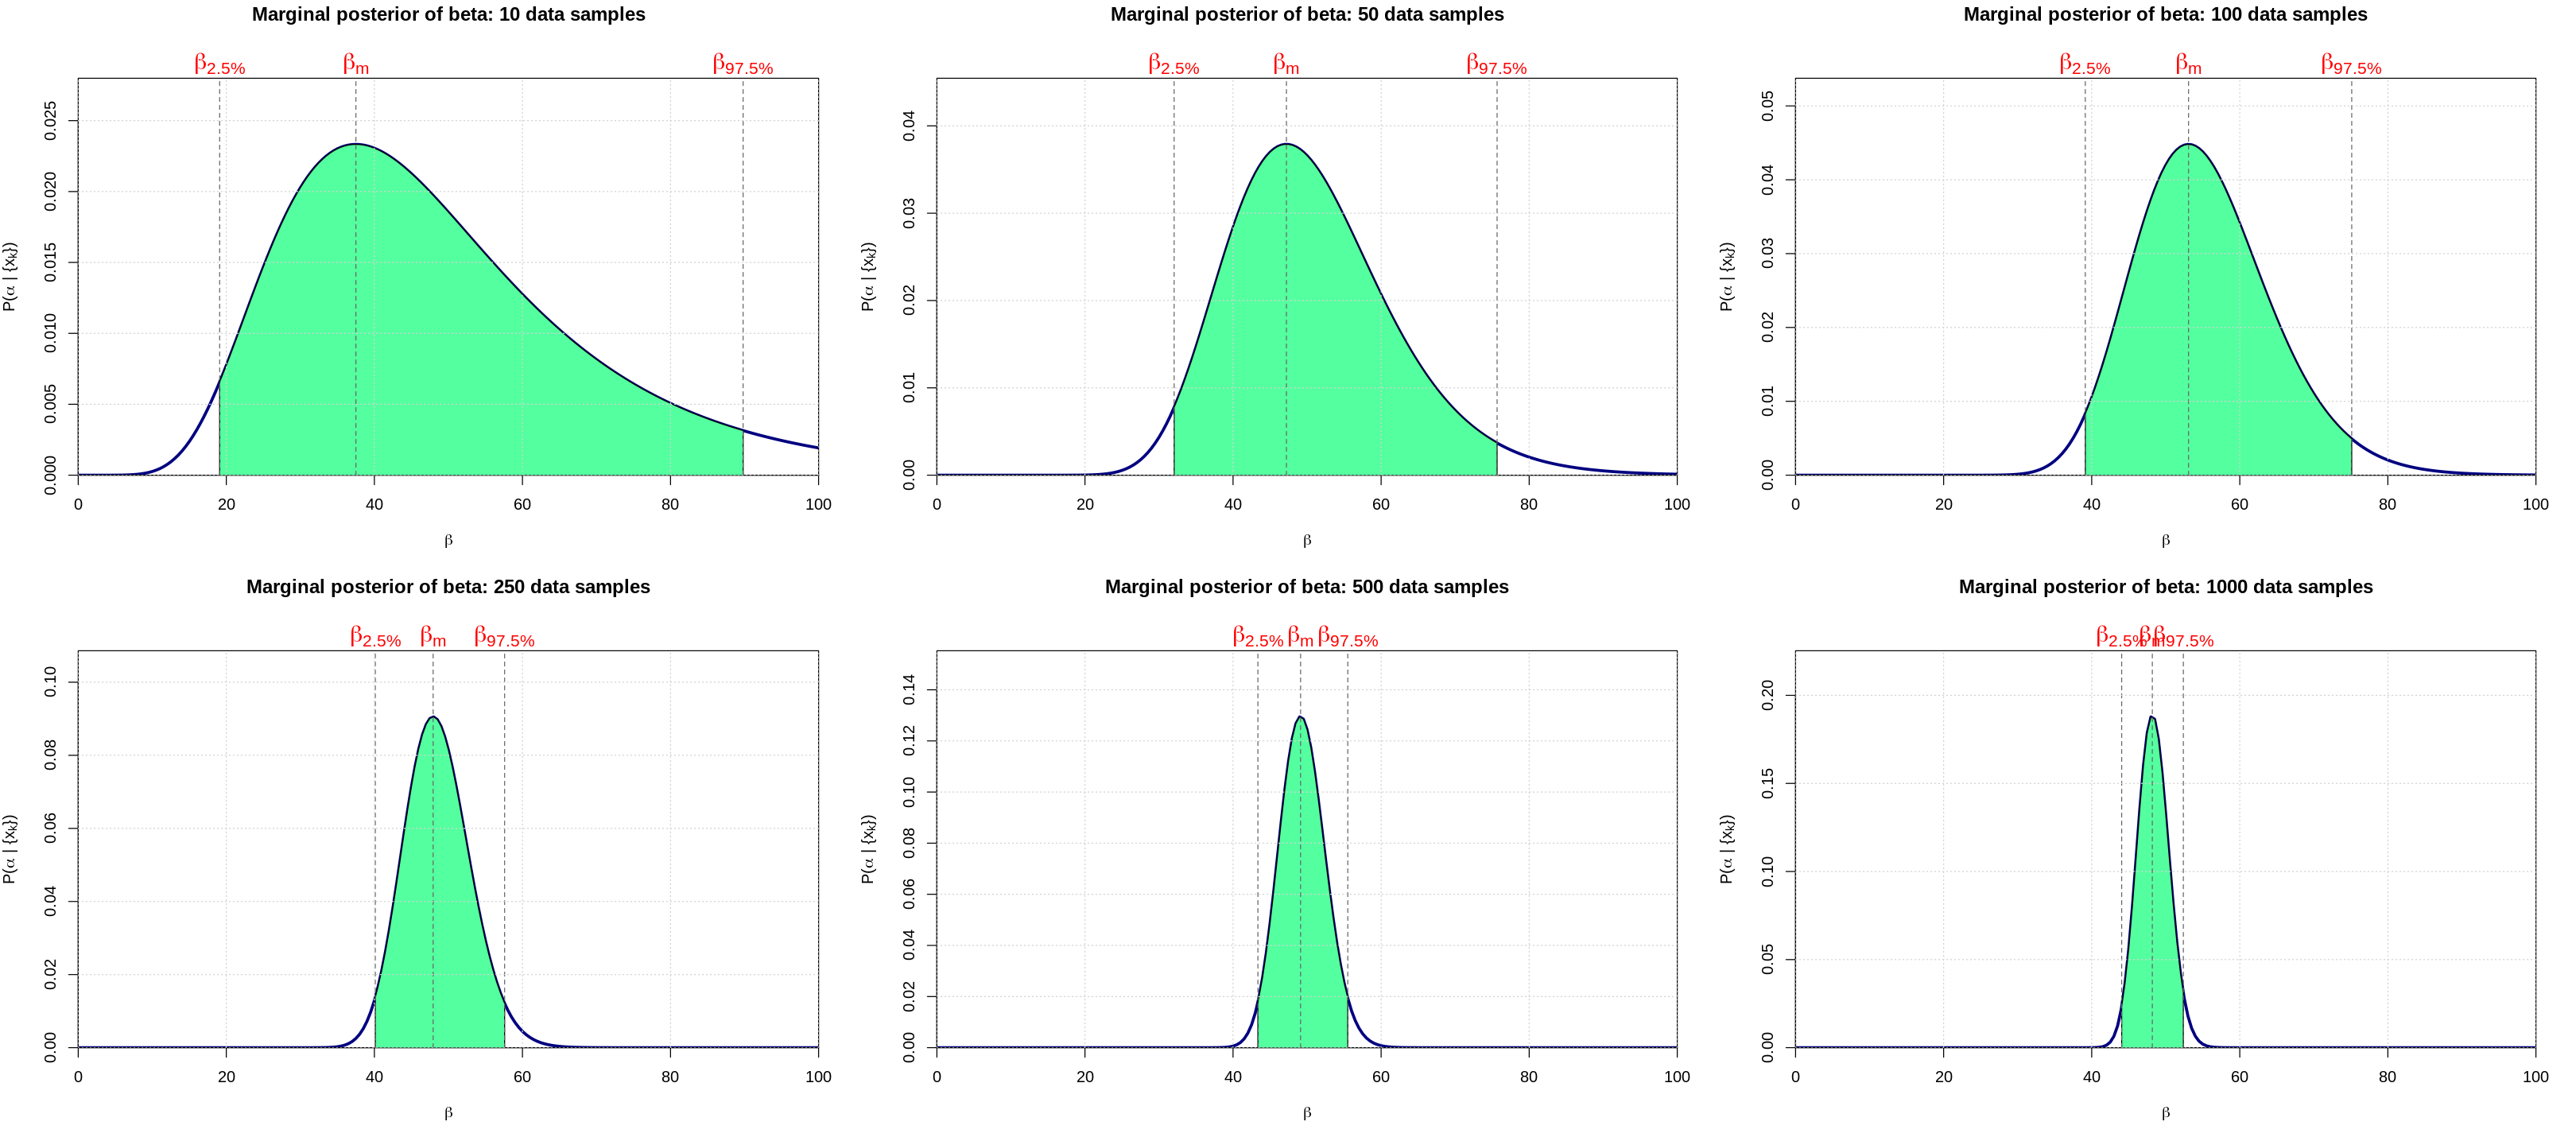

In [145]:
par(mfrow=c(2, 3), cex=1)
options(repr.plot.width=27, repr.plot.height=12)
for (n.data in ns.data) {
    ################################################################
    set.seed(1231629)
    theta.k <- runif(n.data, min=-pi/2, max=+pi/2)
    data    <- beta.t * tan(theta.k) + alpha.t
    ################################################################
    
    ################################################################
    p.log.post <- outer(alpha, beta, Vectorize(function(alpha,beta) f.log.post(alpha, beta, data)))
    p.constant <- max(p.log.post)
    p.log.post <- p.log.post - p.constant #to avoid under/overflows
    p.post.n   <- exp(p.log.post) / (Dab * sum(exp(p.log.post)))
    ################################################################

    ################################################################
    m.b.p.post.n <- apply(p.post.n, 2, sum)
    m.b.p.post.n <- m.b.p.post.n / (Db * sum(m.b.p.post.n))
    ################################################################
    
    ################################################################
    m.m.b <- get.x.dmax(beta,  m.b.p.post.n)
    c.m.b <- get.c.int (beta,  m.b.p.post.n, cl=0.95)
    ################################################################
                                               
    ################################################################
    # Code for polygon function
    xs.m.b   <- beta[which(beta > c.m.b[1] & beta < c.m.b[2])]
    ys.m.b   <- m.b.p.post.n[which(beta > c.m.b[1] & beta < c.m.b[2])]
    xs.m.b   <- c(c.m.b[1], c.m.b[1], xs.m.b, c.m.b[2], c.m.b[2])
    ys.m.b.b <- outer(alpha, c.m.b, function(alpha,beta) f.log.post(alpha, beta, data))
    ys.m.b.b <- ys.m.b.b - p.constant
    ys.m.b.b <- exp(ys.m.b.b) / (Dab * sum(exp(p.log.post)))
    ys.m.b.b <- apply(ys.m.b.b, 2, sum)
    ys.m.b.b <- ys.m.b.b / (Db * sum(apply(p.post.n, 2, sum)))
    ys.m.b   <- c(0, ys.m.b.b[1], ys.m.b, ys.m.b.b[2], 0)
    ################################################################
                                               
    ################################################################
    plot(beta, m.b.p.post.n, 
         xaxs='i', yaxs='i', col='navy', 
         type='l', lty=1, lwd=3, 
         ylim=c(0,1.2*max(m.b.p.post.n)), 
         xlab=expression(beta),
         ylab=expression(paste("P(",alpha," | {x"["k"],"})")))
    polygon(x=xs.m.b, y=ys.m.b, col='seagreen1')
    abline(v=m.m.b,    col="grey40", lty=2)
    abline(v=c.m.b[1], col="grey40", lty=2)
    abline(v=c.m.b[2], col="grey40", lty=2)
    text(m.m.b,    1.08*par("usr")[4], labels=expression(beta["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
    text(c.m.b[1], 1.08*par("usr")[4], labels=expression(beta["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
    text(c.m.b[2], 1.08*par("usr")[4], labels=expression(beta["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)
    title(sprintf("Marginal posterior of beta: %d data samples", n.data), line=3)
    grid()
    ################################################################
}

***
## Exercise 3 <a class="anchor" id="Ex3."></a>
* [Index](#ExI)
***

**Define the functions needed for the exercise**

In [146]:
# Generative model
signal <- function (x, A, B, x0, w, Dt) {
    Dt * (A * exp(- (x-x0)^2 / (2*w^2)) + B)
}

In [147]:
# Log posterior
log.post <- function (d, x, A, B, x0, w, Dt) {
    if (A<0 || B<0) {
        return (-Inf)
    } # the effect of the prior
    
    sum(dpois(d, lambda=signal(x, A, B, x0, w, Dt), log=TRUE))
}

**Define model parameters**

In [186]:
x0     <- 0 # Signal peak
w      <- 1 # Signal width
A.true <- 2 # Signal amplitude
B.true <- 1 # Background amplitude
Dt     <- 5 # Exposure time

### 3.1. - Results for different resolutions <a class="anchor" id="Ex3.1."></a>

**Plot of the signal depending on the sampling resolution $r \cdot w$**

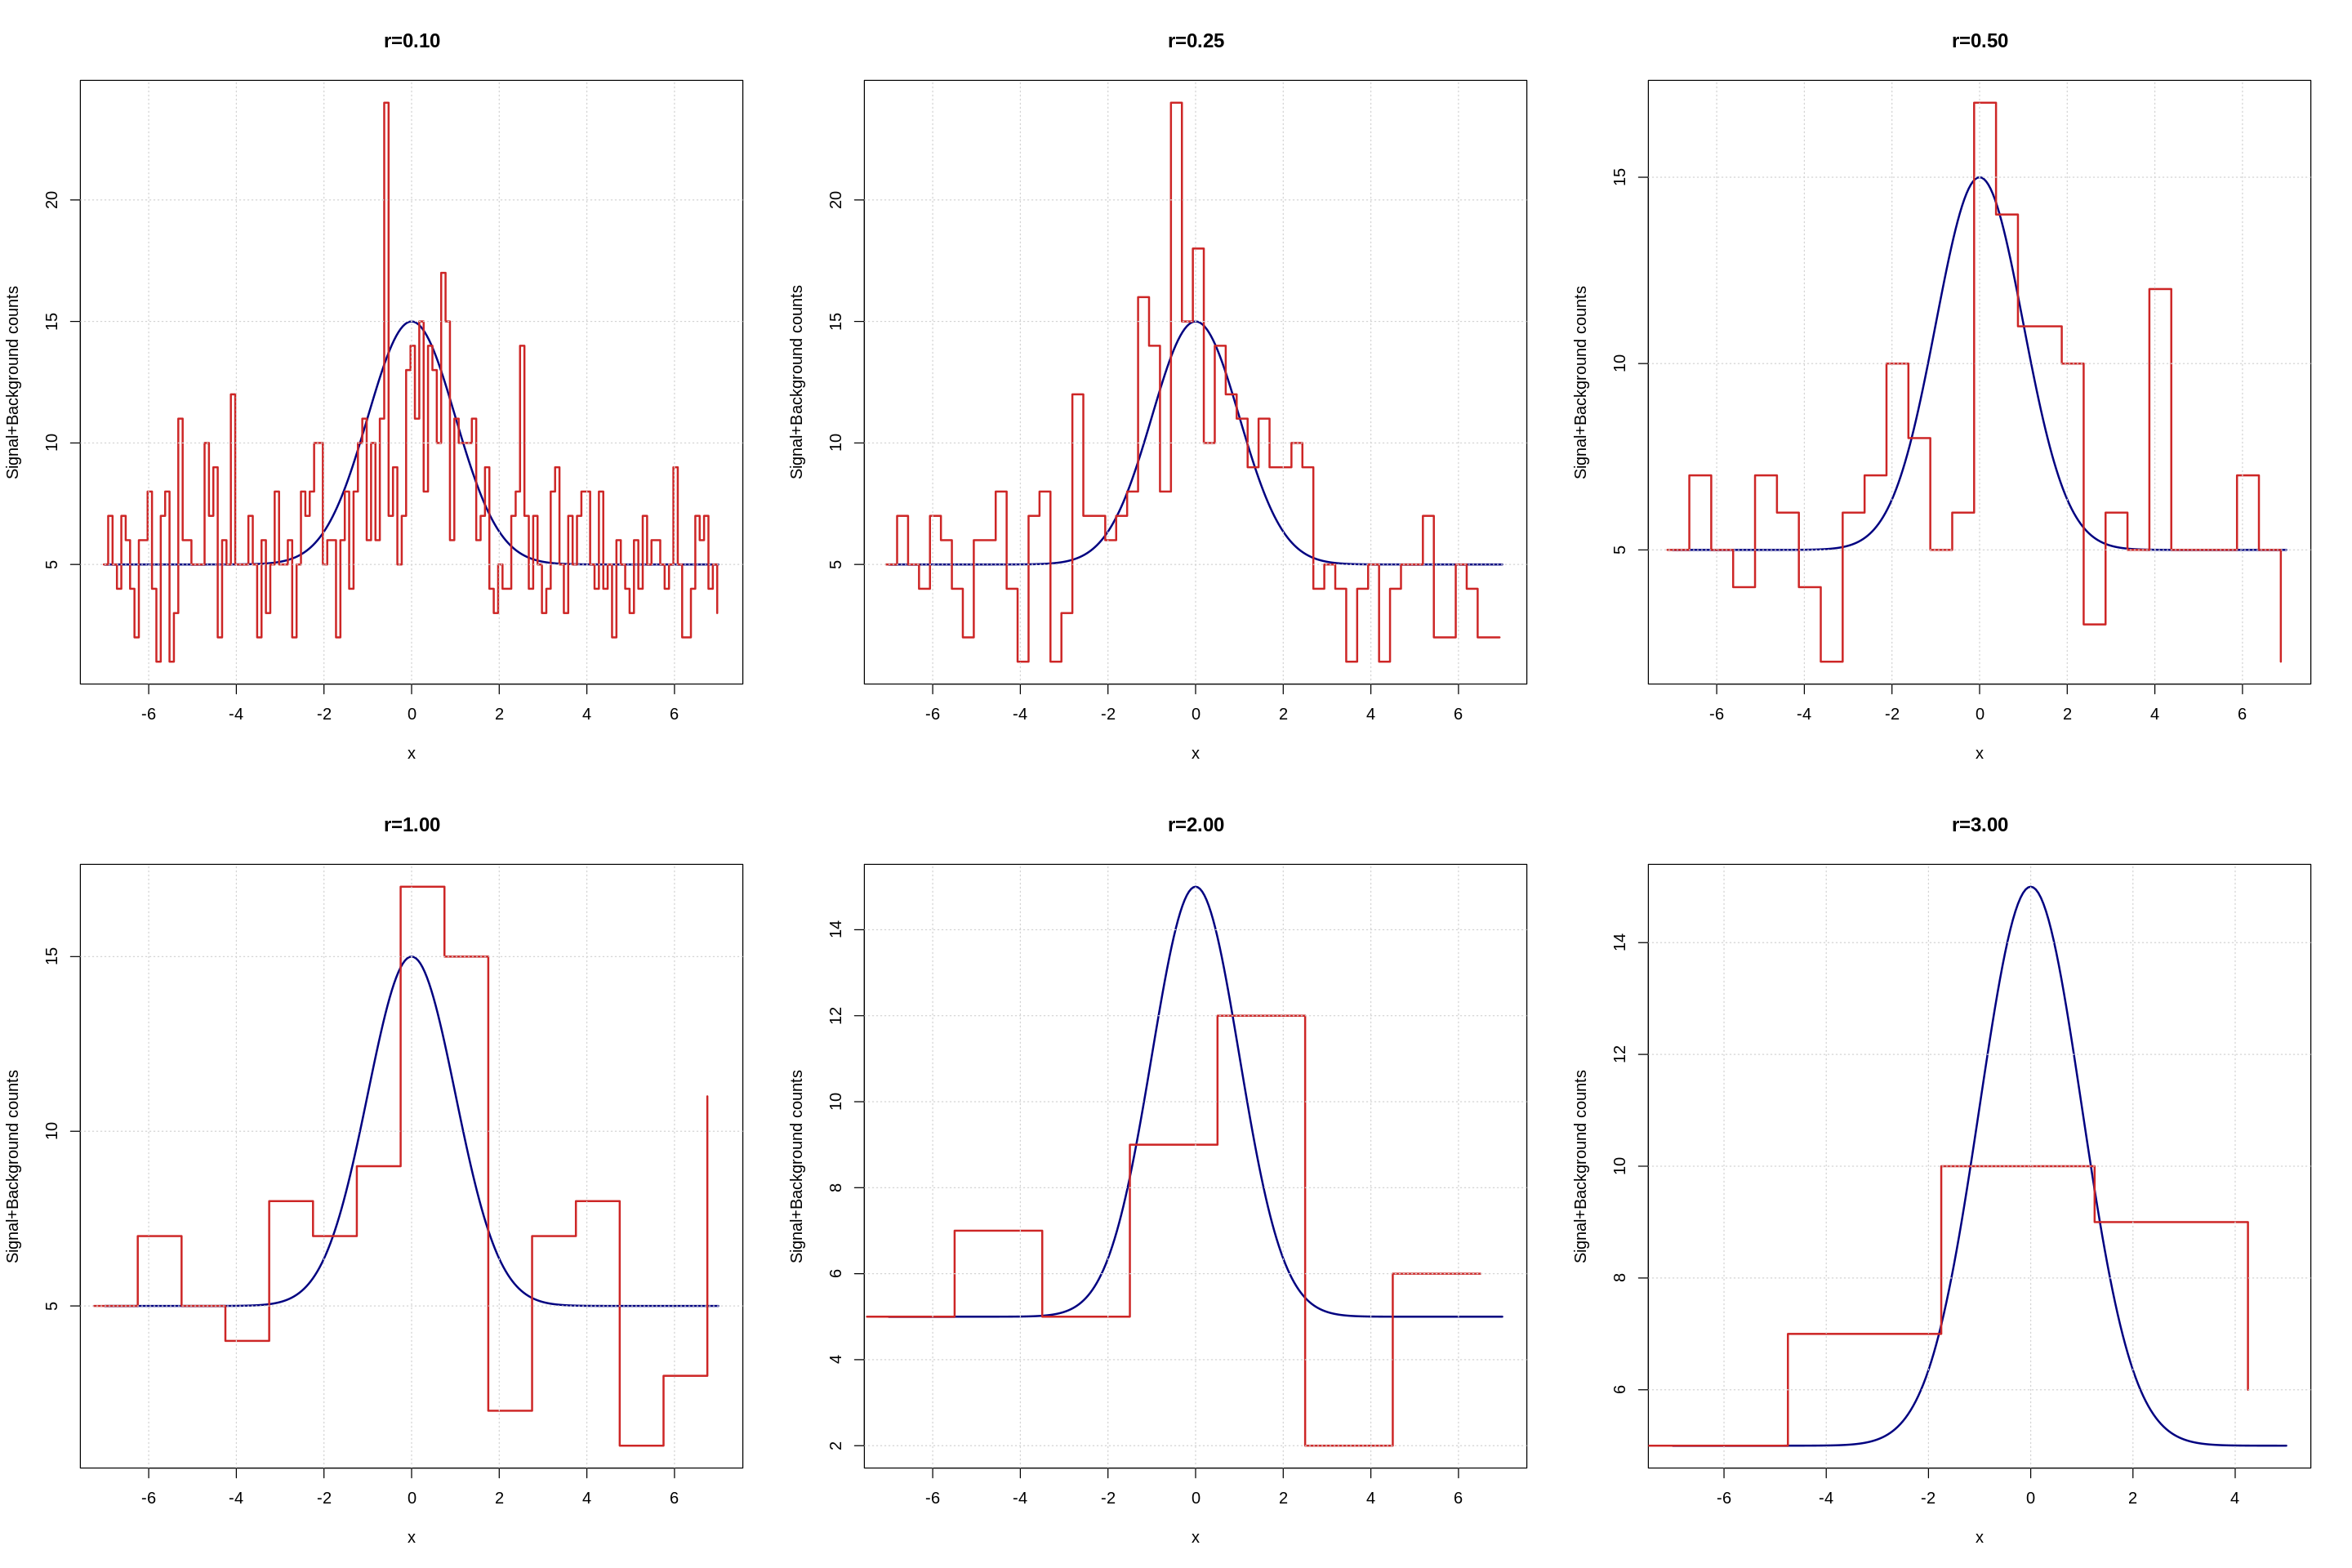

In [187]:
rs <- c(0.1, 0.25, 0.5, 1, 2, 3)

par(mfrow=c(2, 3), cex=1)
options(repr.plot.width=24, repr.plot.height=16)
for (r in rs) {
    set.seed(1231629)
    xdata  <- seq(from=-7*w, to=7*w, by=r*w)
    s.true <- signal(xdata, A.true, B.true, x0, w, Dt)
    ddata  <- rpois(length(s.true), s.true)
    
    x.plot <- seq(from=min(xdata), to=max(xdata), by=0.05*w)
    s.plot <- signal(x.plot, A.true, B.true, x0, w, Dt)
    
    plot(x.plot, s.plot, type="l", col="navy", lwd=2,
         xlab="x", ylab="Signal+Background counts", main=sprintf("r=%1.2f",r),
         xlim=range(x.plot), ylim=range(c(s.plot, ddata)))
    
    xdata.off <- xdata - 0.25*r
    lines(xdata.off, ddata, type="s", col="firebrick3", lwd=2)
    grid()
}

**Contour plot of the unnormalized posterior depending on the sampling resolution $r \cdot w$**

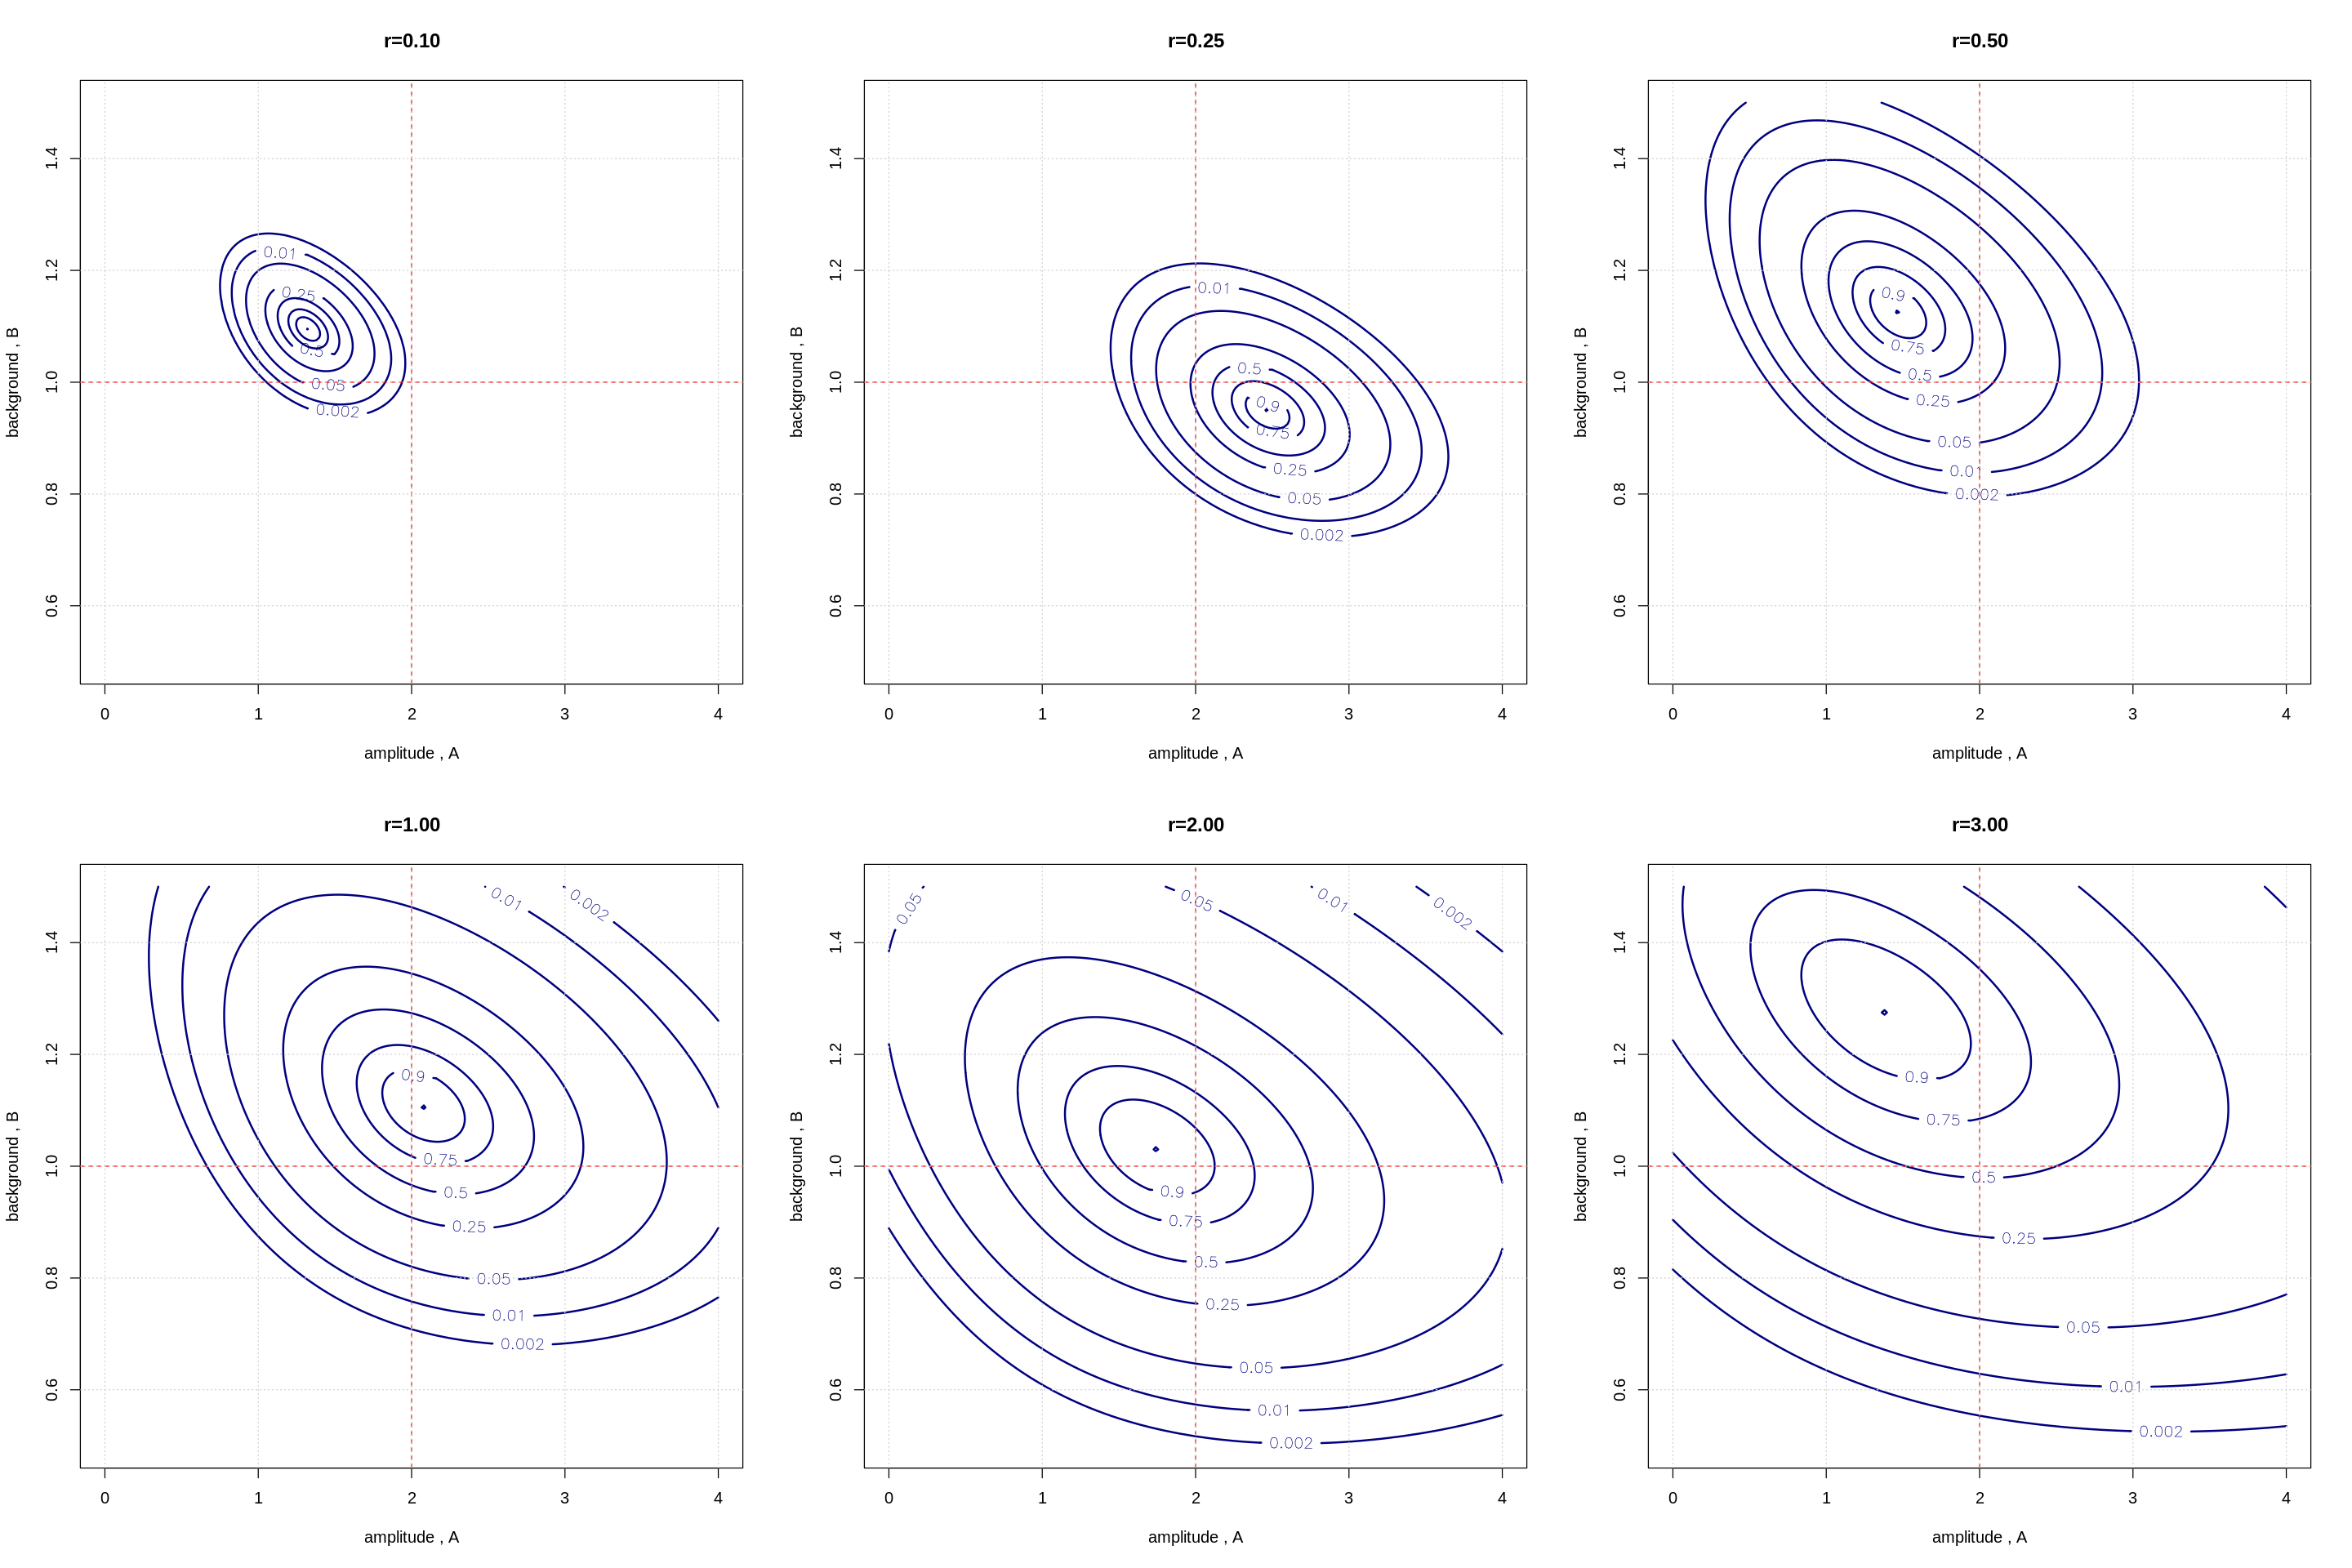

In [188]:
l <- 201
A <- seq(0.0, 4.0, length.out=l)
B <- seq(0.5, 1.5, length.out=l)

par(mfrow=c(2, 3), cex=1)
options(repr.plot.width=24, repr.plot.height=16)
for (r in rs) {
    set.seed(1231629)
    xdata  <- seq(from=-7*w, to=7*w, by=r*w)
    s.true <- signal(xdata , A.true, B.true , x0, w, Dt)
    ddata  <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow=length(A), ncol=length(B))
    for(j in 1:length(A)) {
        for(k in 1:length(B)) {
            z[j,k] <- log.post(ddata, xdata, A[j], B[k], x0, w, Dt)
        }
    }
    z <- z - max(z) # set maximum to zero

    # Plot unnormalized 2D posterior as contours .
    contour(A, B, exp(z),
        #nlevels=10,
        levels=c(0.002, 0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 1.0),
        labcex=1,
        lwd=2,
        col="navy",
        main=sprintf("Posterior for r=%1.2f",r),
        xlab="amplitude , A",
        ylab="background , B")
    abline(v=2, h=1, col="red", lty=2)
    grid()
}

**Marginalization for $A$**

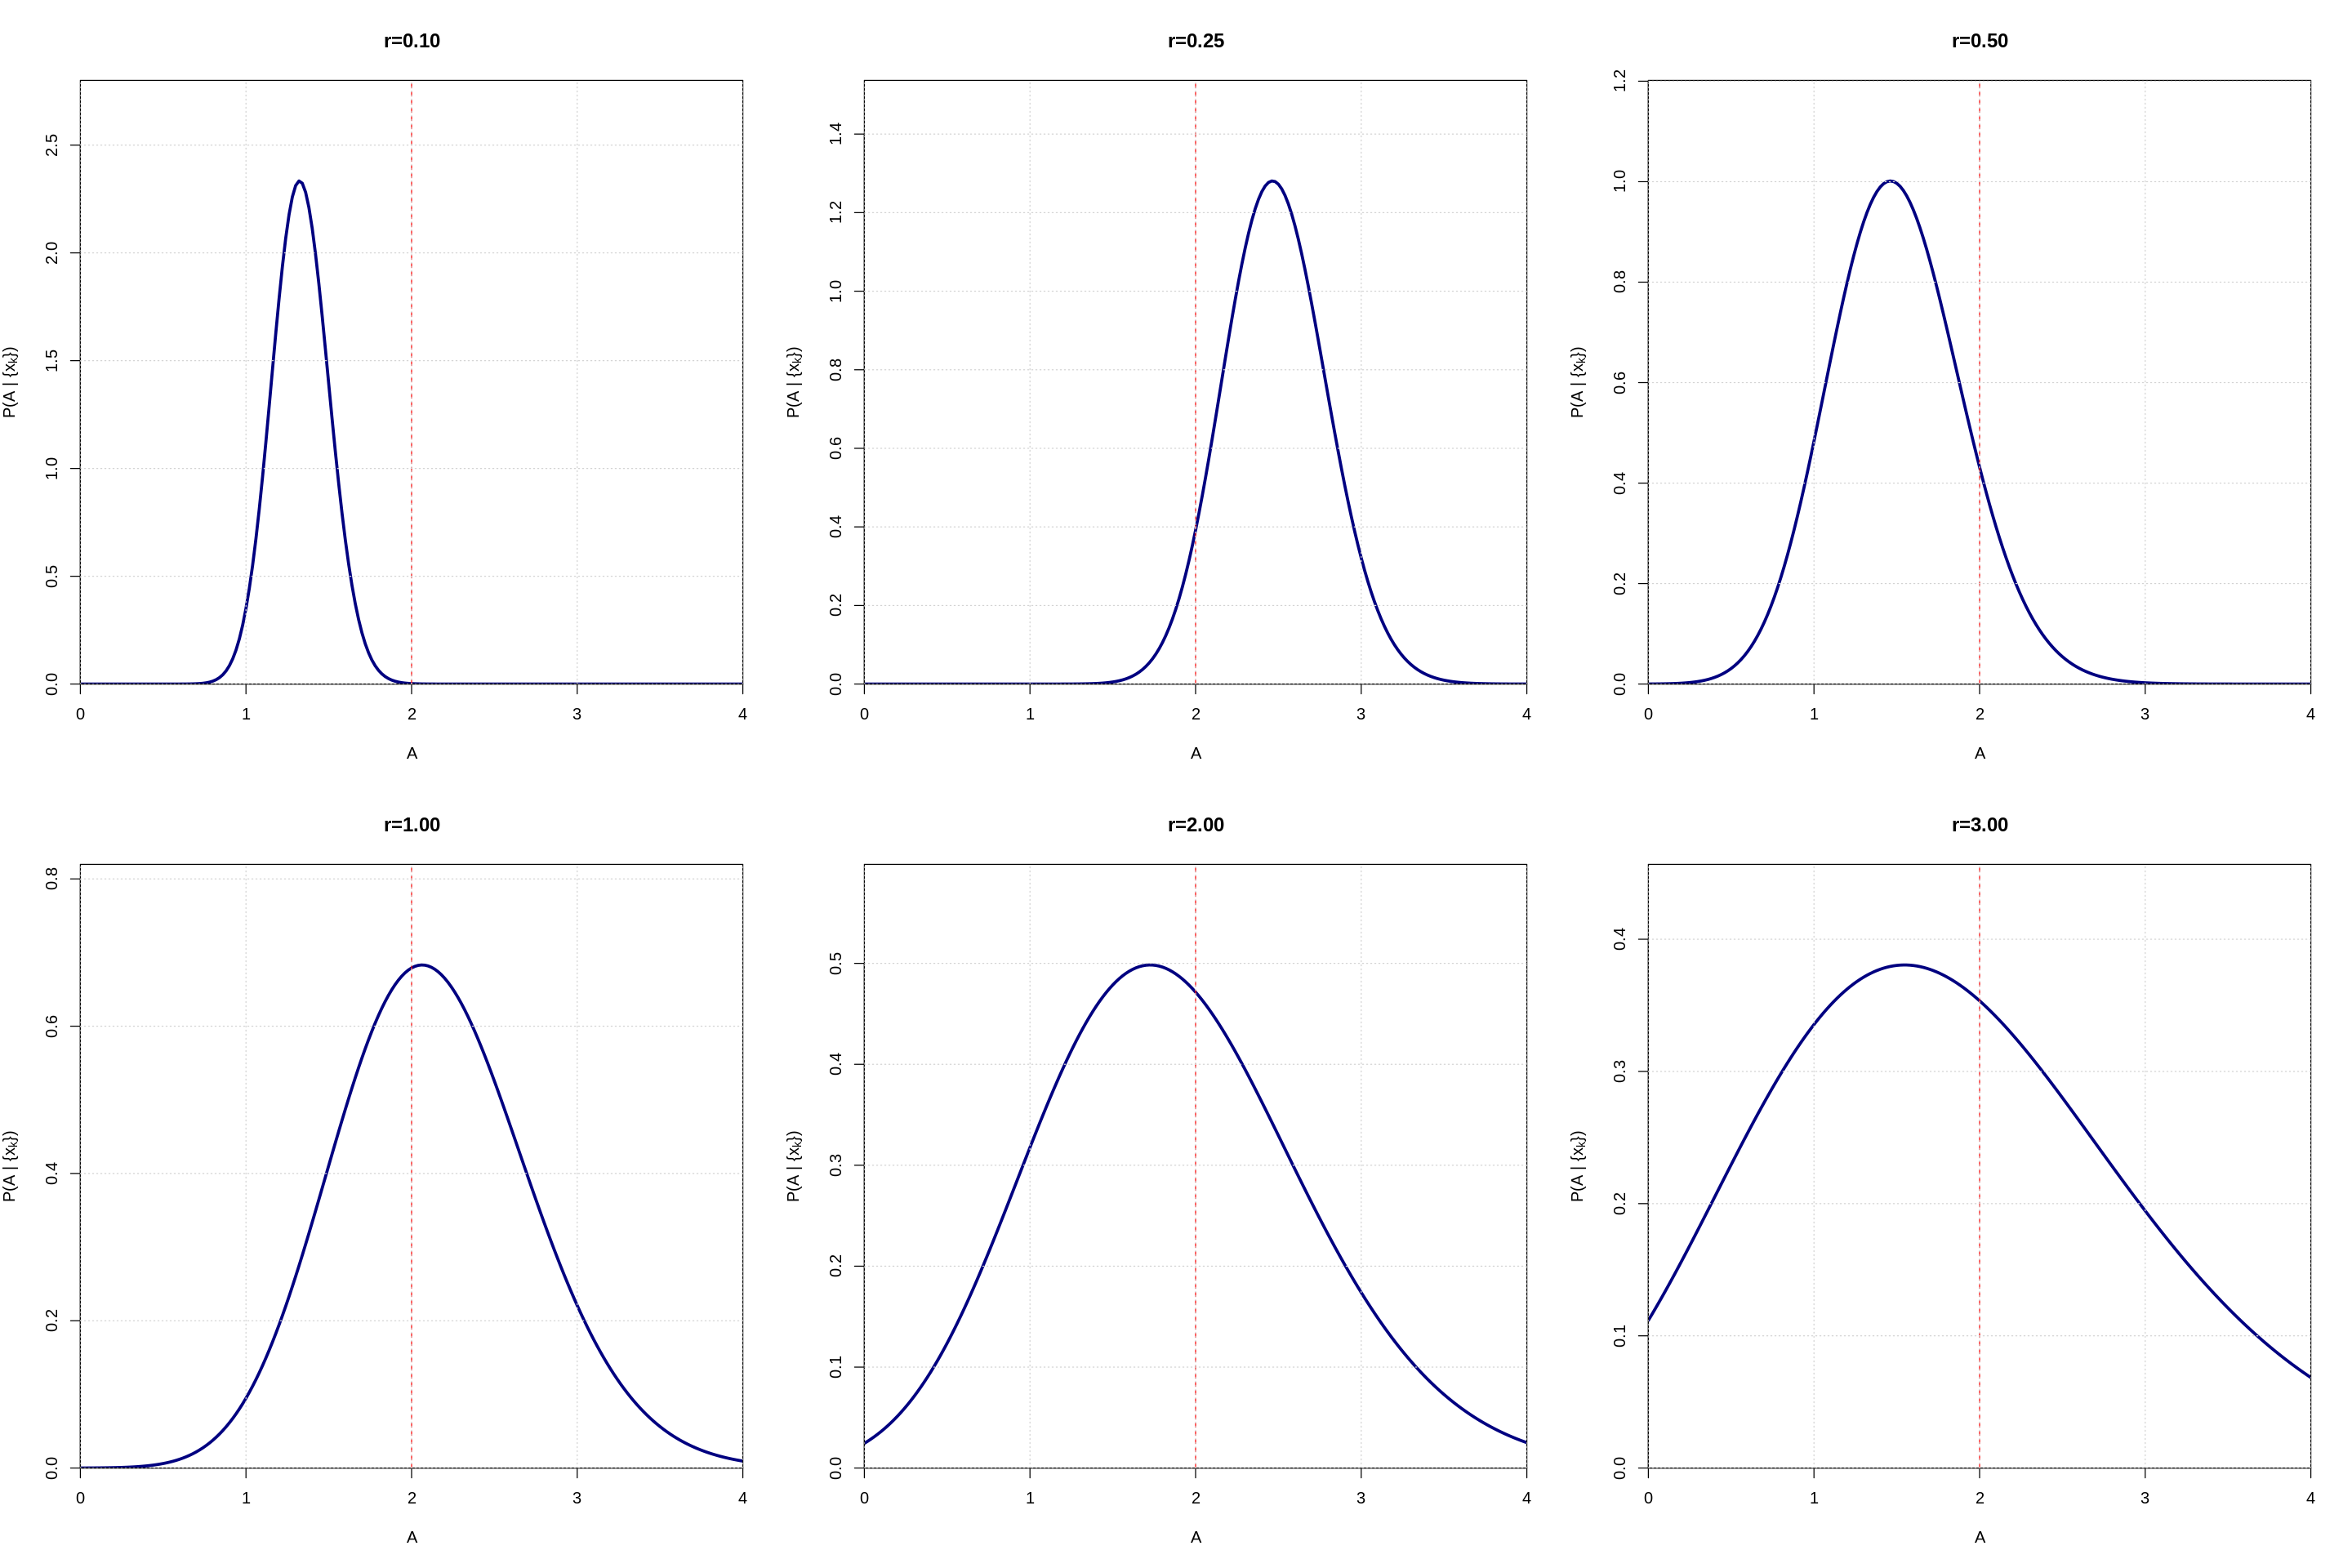

In [190]:
l <- 201
A <- seq(0.0, 4.0, length.out=l)
B <- seq(0.5, 1.5, length.out=l)

DA <- A[2] - A[1]
DB <- B[2] - B[1]

par(mfrow=c(2, 3), cex=1)
options(repr.plot.width=24, repr.plot.height=16)
for (r in rs) {
    set.seed(1231629)
    xdata  <- seq(from=-7*w, to=7*w, by=r*w)
    s.true <- signal(xdata , A.true, B.true , x0, w, Dt)
    ddata  <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow=length(A), ncol=length(B))
    for(j in 1:length(A)) {
        for(k in 1:length(B)) {
            z[j,k] <- log.post(ddata, xdata, A[j], B[k], x0, w, Dt)
        }
    }
    z <- z - max(z) # set maximum to zero

    z.a   <- apply(exp(z), 1, sum)
    z.a.n <- z.a / (DA * sum(z.a))
    
    # Plot normalized marginal posterior for A
    plot(A, z.a.n,
        xaxs='i', yaxs='i', col='navy', 
        type='l', lty=1, lwd = 3, 
        ylim=c(0,1.2*max(z.a.n)), 
        xlab=expression(A),
        ylab=expression(paste("P(",A," | {x"["k"],"})")),
        main=sprintf("r=%1.2f",r))
    abline(v=2, col="red", lty=2)
    grid()
}

**Marginalization for $B$**

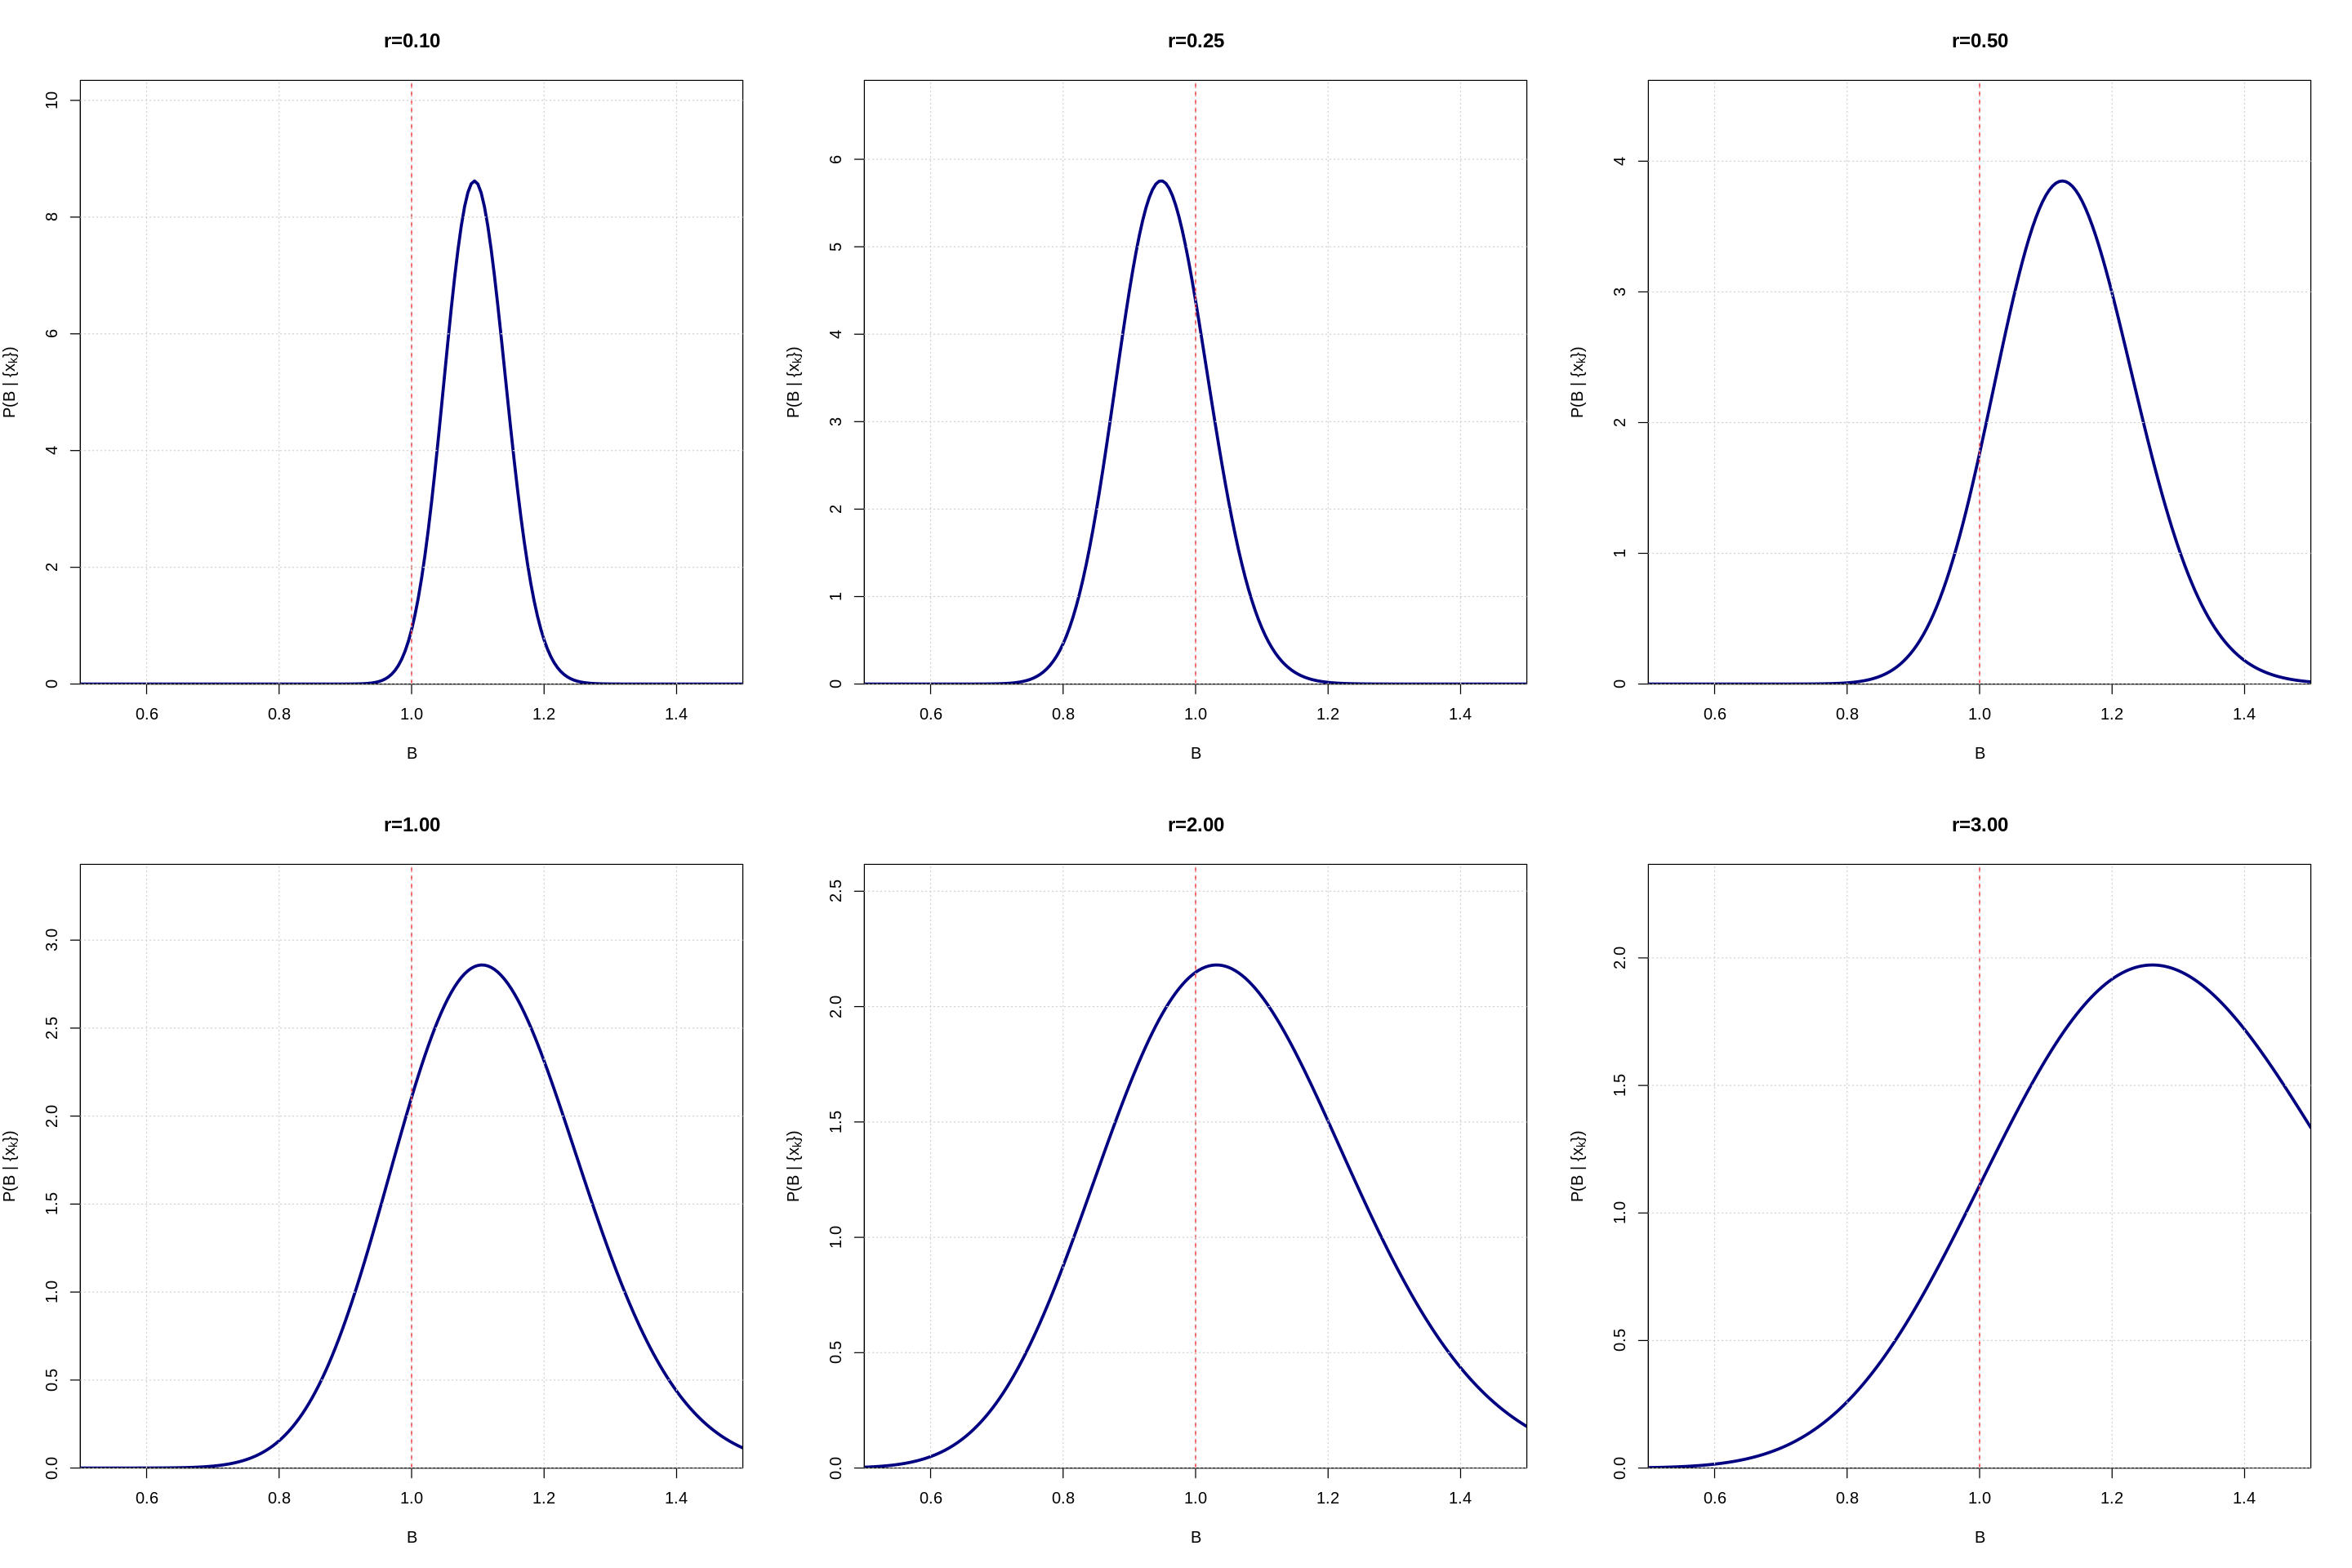

In [191]:
l <- 201
A <- seq(0.0, 4.0, length.out=l)
B <- seq(0.5, 1.5, length.out=l)

DA <- A[2] - A[1]
DB <- B[2] - B[1]

par(mfrow=c(2, 3), cex=1)
options(repr.plot.width=24, repr.plot.height=16)
for (r in rs) {
    set.seed(1231629)
    xdata  <- seq(from=-7*w, to=7*w, by=r*w)
    s.true <- signal(xdata , A.true, B.true , x0, w, Dt)
    ddata  <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow=length(A), ncol=length(B))
    for(j in 1:length(A)) {
        for(k in 1:length(B)) {
            z[j,k] <- log.post(ddata, xdata, A[j], B[k], x0, w, Dt)
        }
    }
    z <- z - max(z) # set maximum to zero

    z.b   <- apply(exp(z), 2, sum)
    z.b.n <- z.b / (DB * sum(z.b))
    
    # Plot normalized marginal posterior for A
    plot(B, z.b.n,
        xaxs='i', yaxs='i', col='navy', 
        type='l', lty=1, lwd = 3, 
        ylim=c(0,1.2*max(z.b.n)), 
        xlab=expression(B),
        ylab=expression(paste("P(",B," | {x"["k"],"})")),
        main=sprintf("r=%1.2f",r))
    abline(v=1, col="red", lty=2)
    grid()
}

### 3.2. - Results for different $A/B$ ratio <a class="anchor" id="Ex3.2."></a>

**Change model parameters**

In [53]:
x0     <- 0 # Signal peak
w      <- 1 # Signal width
# A.true <- 2 # Signal amplitude
B.true <- 1 # Background amplitude
Dt     <- 5 # Exposure time

**Plot of the signal depending on the $A/B$ ratio**

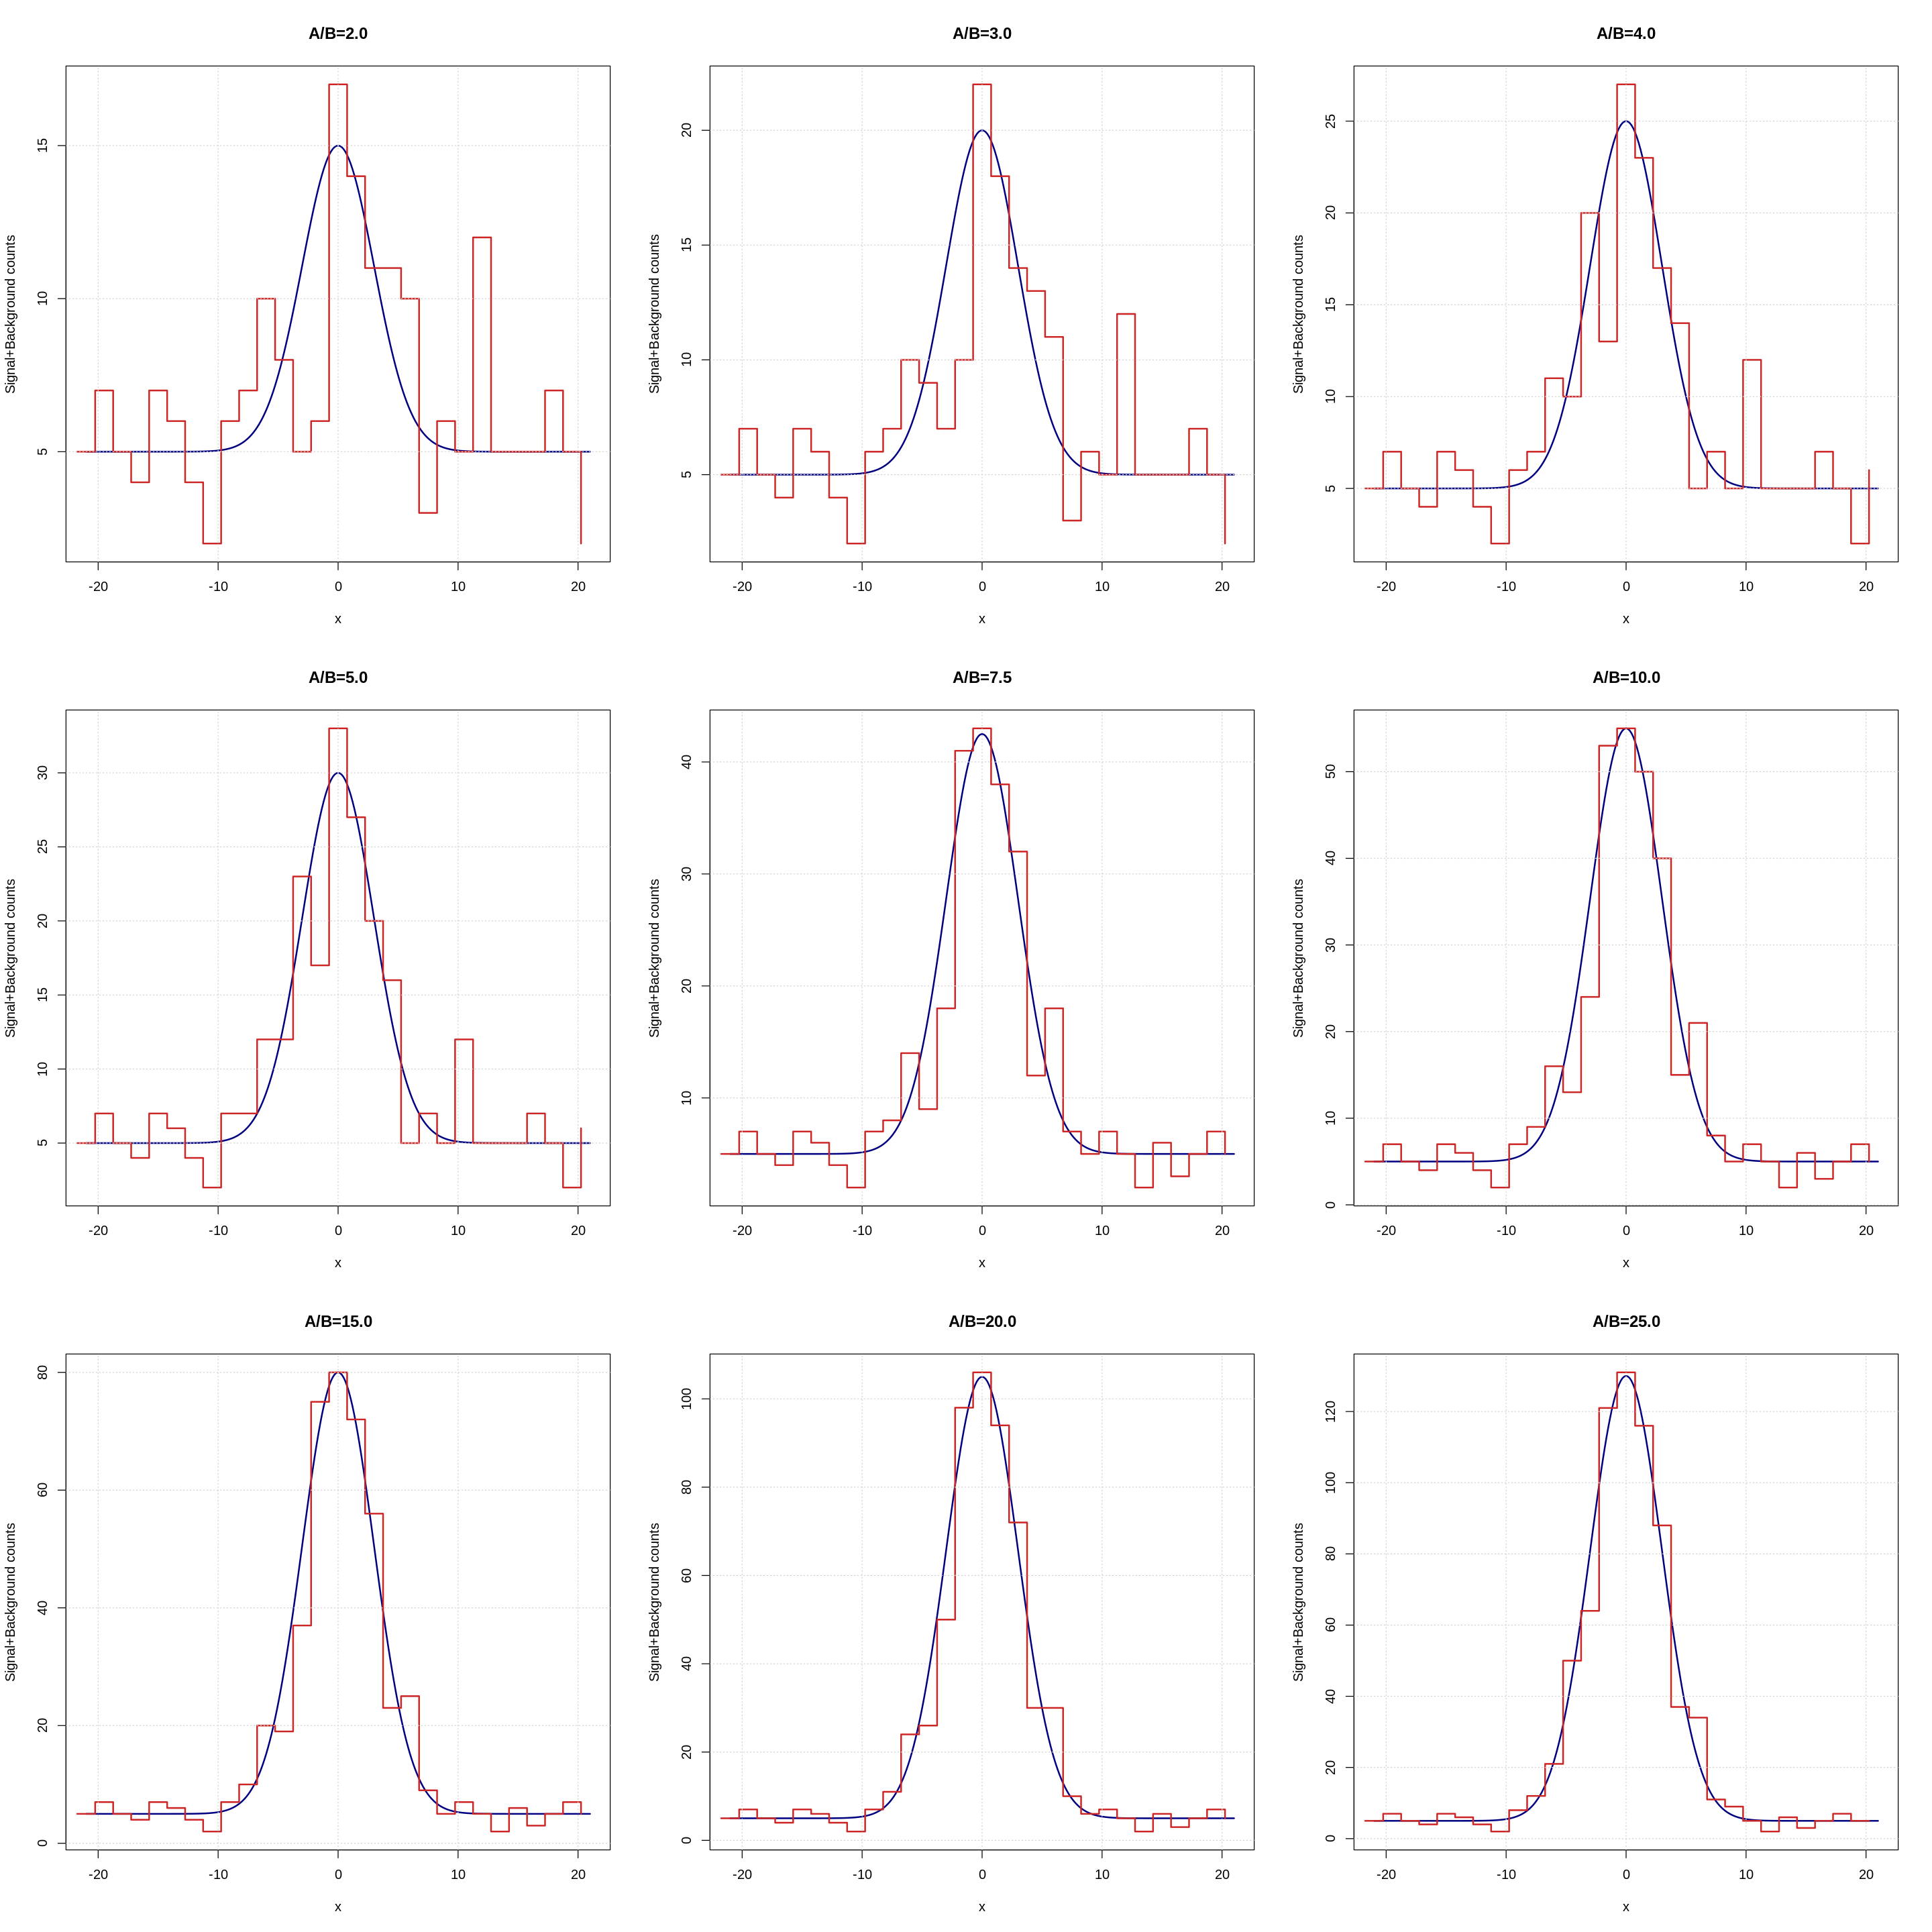

In [177]:
As.true <- c(2, 3, 4, 5, 7.5, 10, 15, 20, 25)

par(mfrow=c(3, 3), cex=1)
options(repr.plot.width=24, repr.plot.height=24)
for (A.true in As.true) {
    SNR <- A.true / B.true
    
    set.seed(1231629)
    xdata  <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdata , A.true , B.true , x0, w, Dt)
    ddata  <- rpois(length(s.true), s.true)
    
    x.plot <- seq(from=min(xdata), to=max(xdata), by=0.05*w)
    s.plot <- signal(x.plot , A.true , B.true , x0, w, Dt)
    
    plot(x.plot, s.plot, type="l", col="navy", lwd=2,
         xlab="x", ylab="Signal+Background counts", main=sprintf("A/B=%2.1f",SNR),
         xlim=range(x.plot), ylim=range(c(s.plot, ddata)))
    xdata.off <- xdata - 0.25*r
    lines(xdata.off, ddata, type="s", col="firebrick3", lwd=2)
    grid()
}

**Contour plot of the unnormalized posterior depending on the $A/B$ ratio**

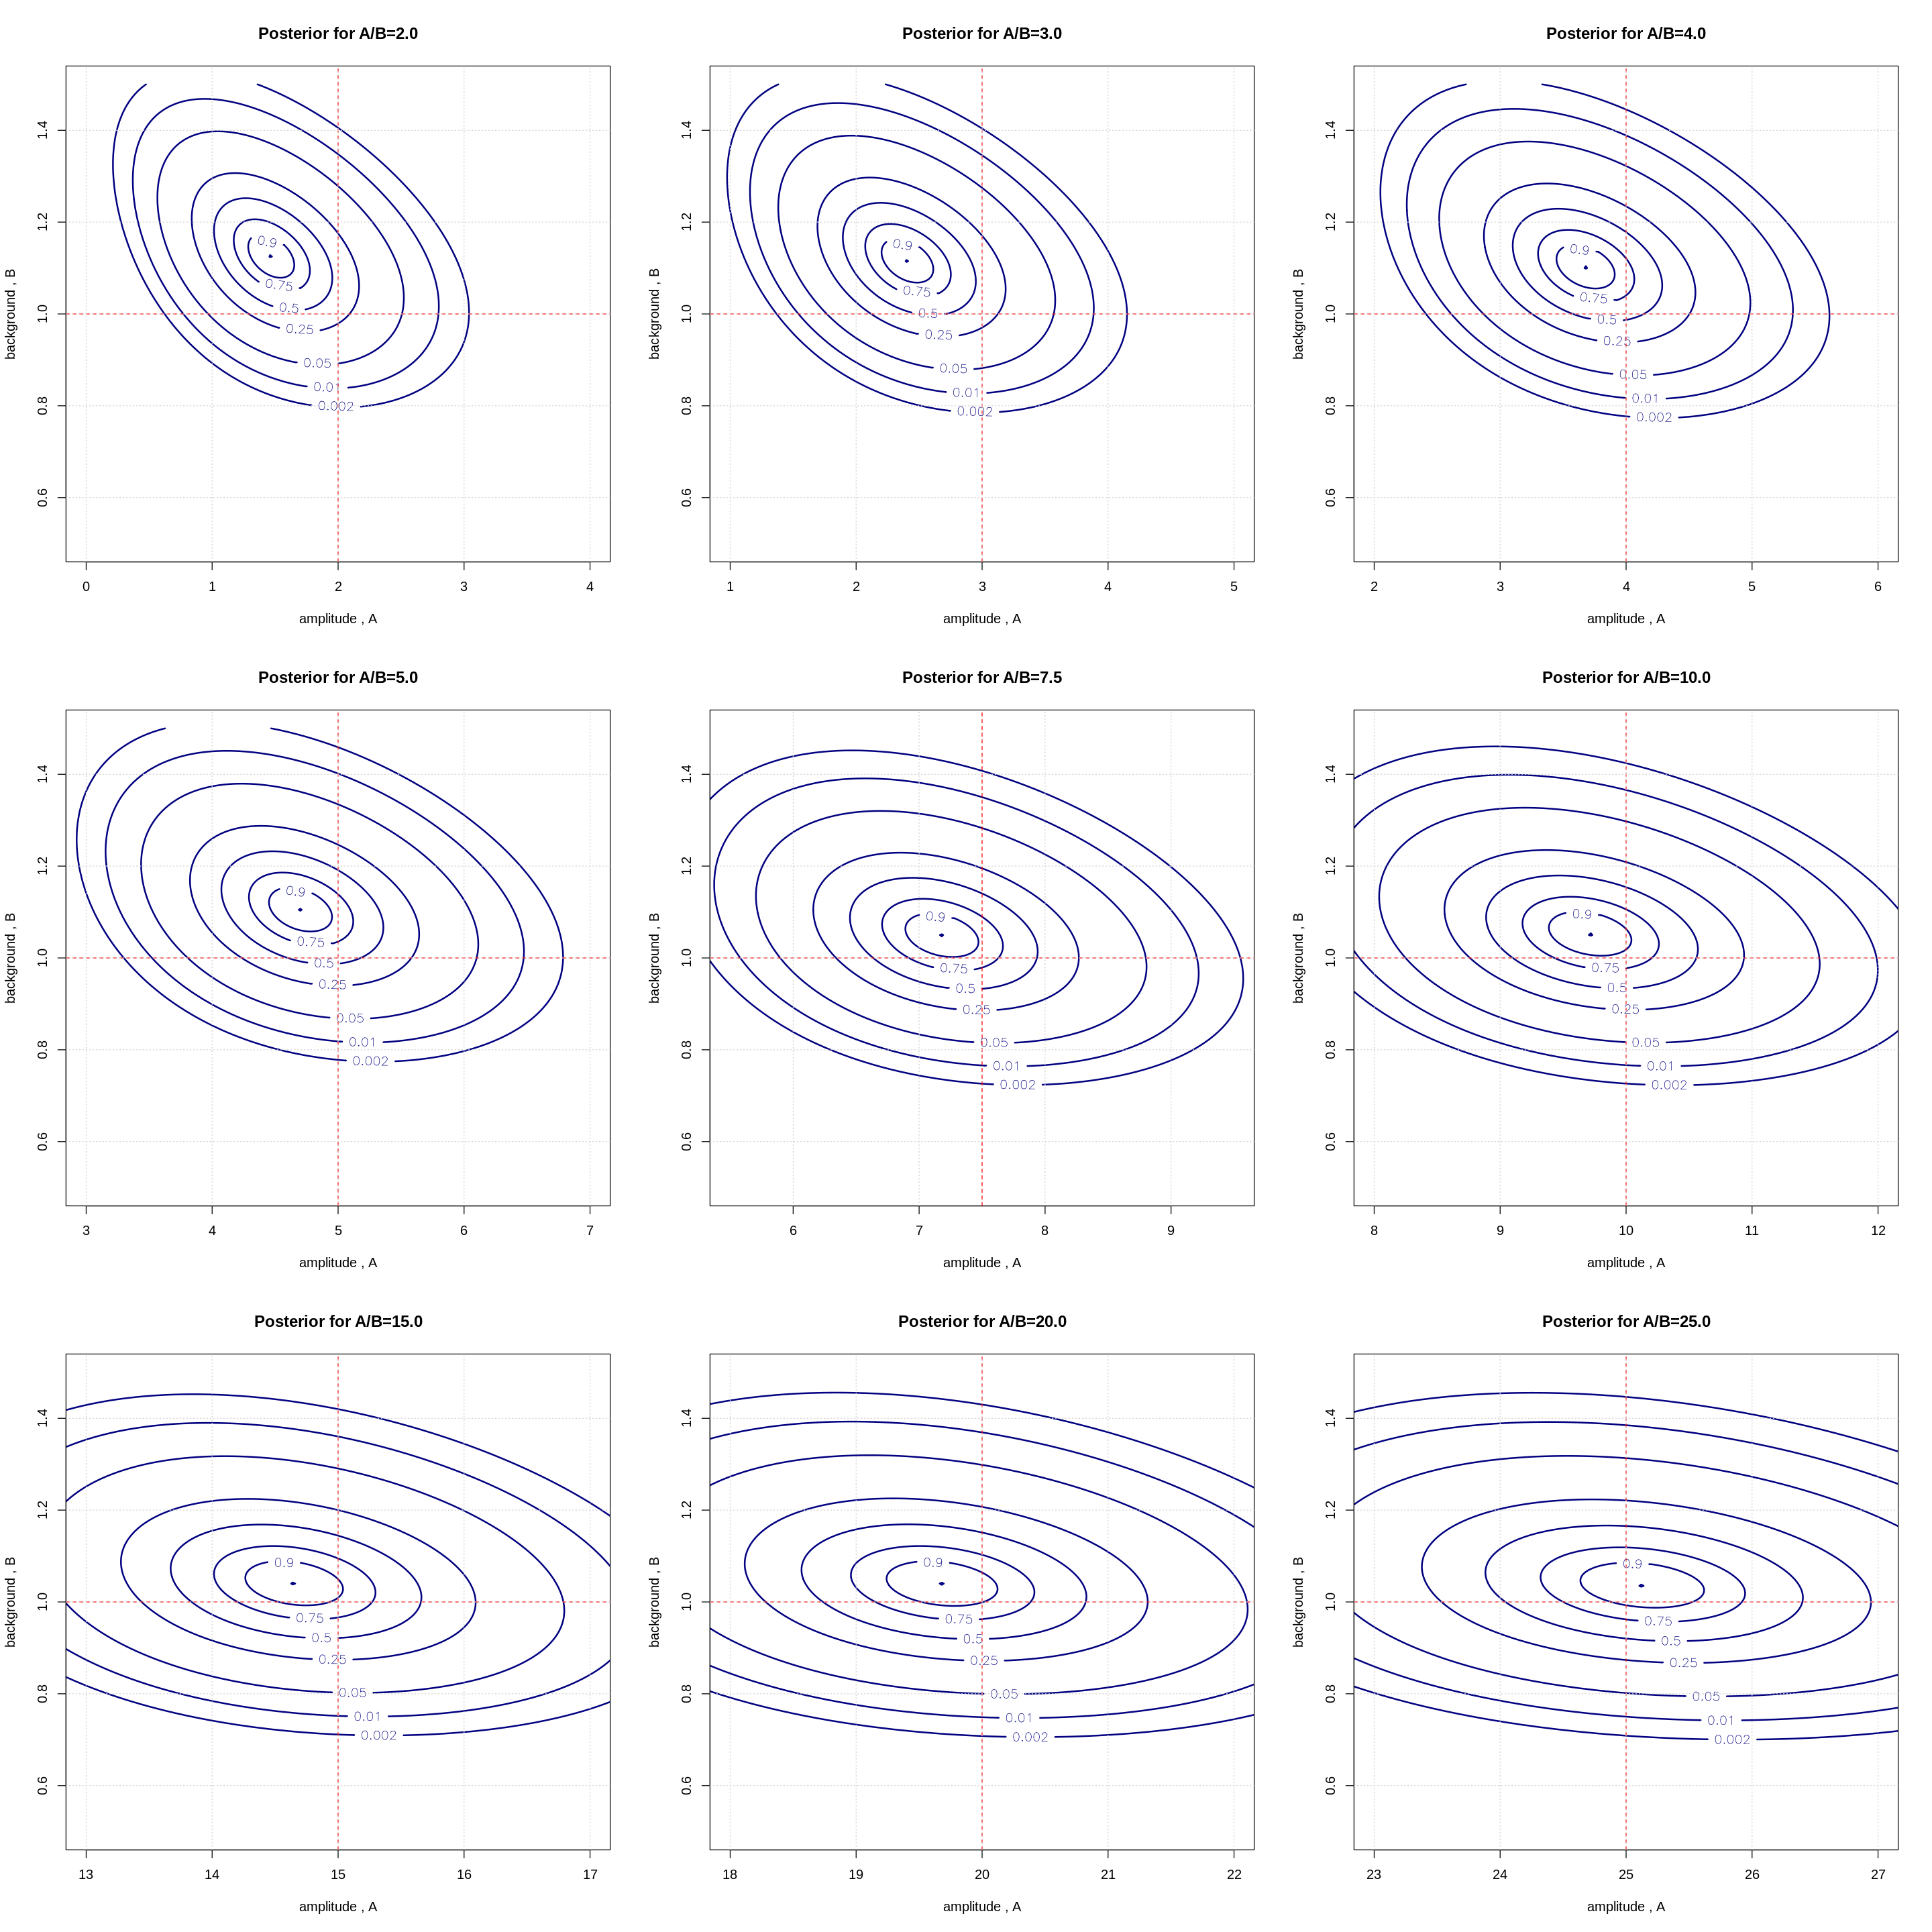

In [192]:
par(mfrow=c(3, 3), cex=1)
options(repr.plot.width=24, repr.plot.height=24)
for (A.true in As.true) {
    l.A <- 100 * A.true + 1
    l.B <- 201
    A   <- seq(0.0, 2*A.true, length.out=l.A)
    B   <- seq(0.5, 1.5, length.out=l.B)
    SNR <- A.true / B.true
    
    set.seed(1231629)
    xdata  <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdata , A.true, B.true , x0, w, Dt)
    ddata  <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow=length(A), ncol=length(B))
    for(j in 1:length(A)) {
        for(k in 1:length(B)) {
            z[j,k] <- log.post(ddata, xdata, A[j], B[k], x0, w, Dt)
        }
    }
    z <- z - max(z) # set maximum to zero

    # Plot unnormalized 2D posterior as contours .
    contour(A, B, exp(z),
        #nlevels=10,
        levels=c(0.002, 0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 1.0),
        xlim=c(A.true-2,A.true+2),
        labcex=1,
        lwd=2,
        col="navy",
        main=sprintf("Posterior for A/B=%2.1f",SNR),
        xlab="amplitude , A",
        ylab="background , B")
    abline(v=A.true, h=1, col="red", lty=2)
    grid()
}

**Marginalization for $A$**

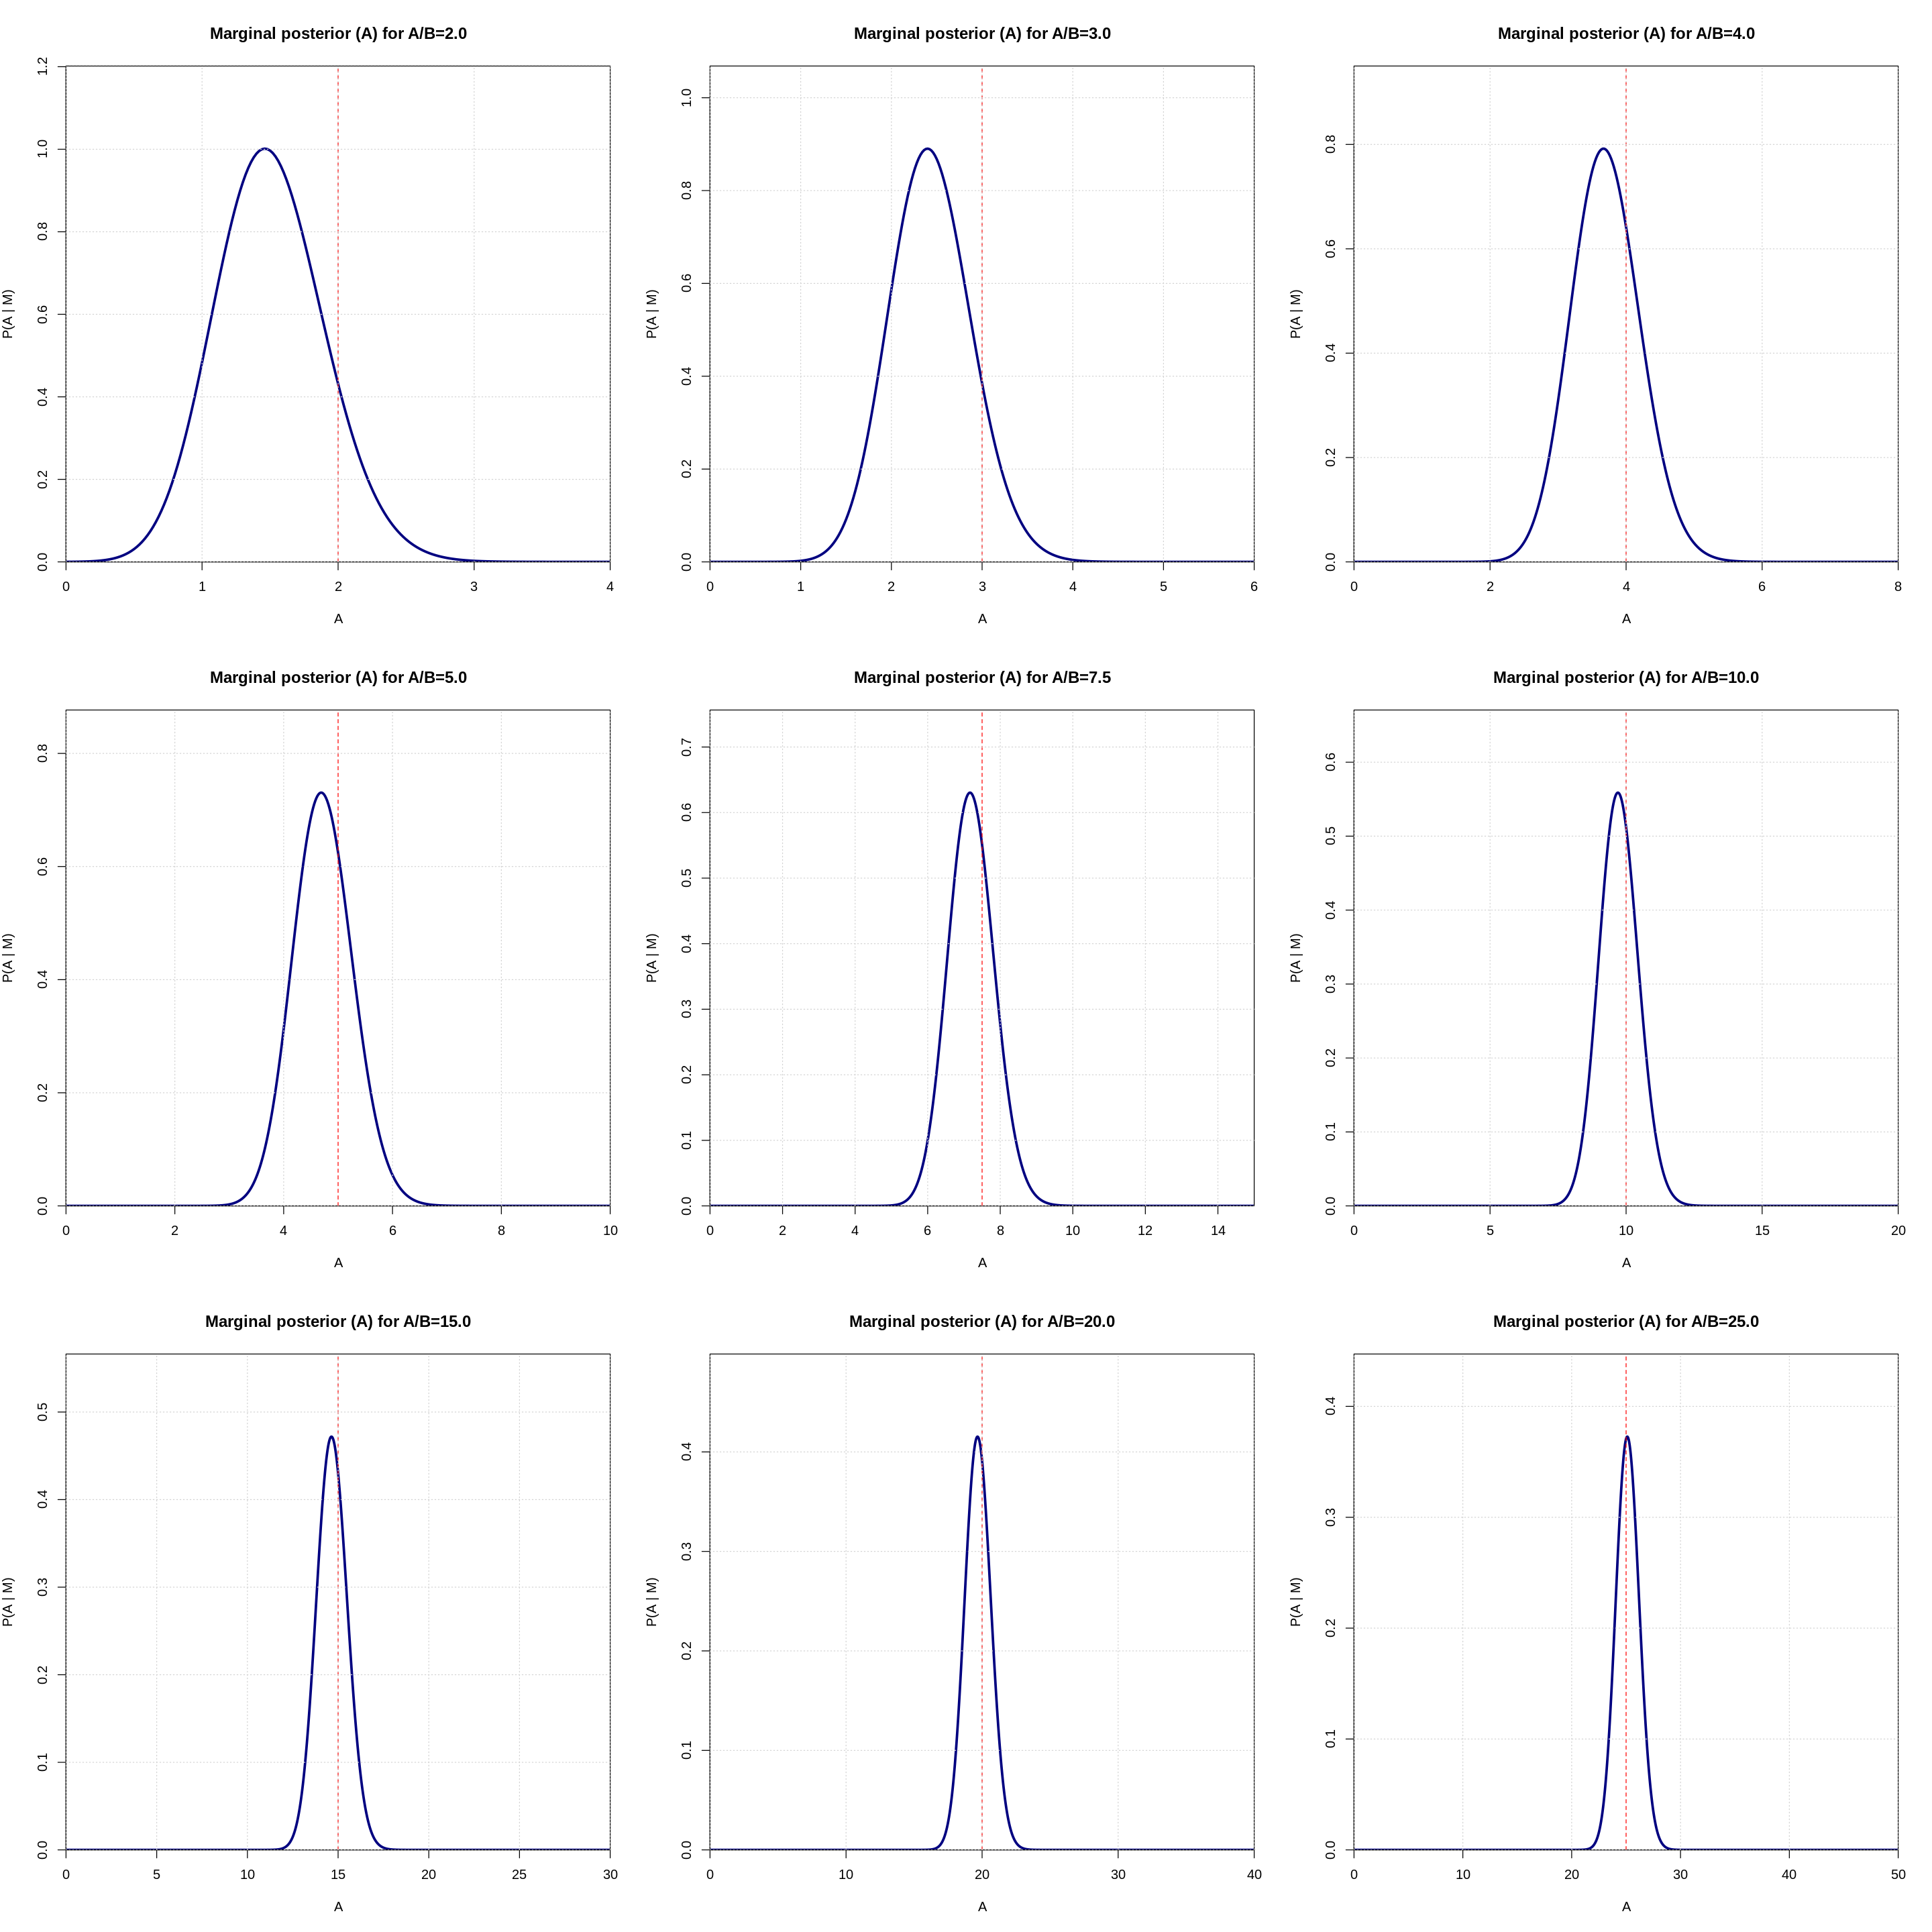

In [193]:
par(mfrow=c(3, 3), cex=1)
options(repr.plot.width=24, repr.plot.height=24)
for (A.true in As.true) {
    l.A <- 100 * A.true + 1
    l.B <- 201
    A   <- seq(0.0, 2*A.true, length.out=l.A)
    B   <- seq(0.5, 1.5, length.out=l.B)
    DA  <- A[2] - A[1]
    DB  <- B[2] - B[1]
    SNR <- A.true / B.true
    
    set.seed(1231629)
    xdata  <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdata , A.true, B.true , x0, w, Dt)
    ddata  <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow=length(A), ncol=length(B))
    for(j in 1:length(A)) {
        for(k in 1:length(B)) {
            z[j,k] <- log.post(ddata, xdata, A[j], B[k], x0, w, Dt)
        }
    }
    z <- z - max(z) # set maximum to zero

    z.a   <- apply(exp(z), 1, sum)
    z.a.n <- z.a / (DA * sum(z.a))
    
    # Plot normalized marginal posterior for A
    plot(A, z.a.n,
        xaxs='i', yaxs='i', col='navy', 
        type='l', lty=1, lwd = 3, 
        ylim=c(0,1.2*max(z.a.n)), 
        xlab=expression(A),
        ylab=expression(paste("P(",A," | {x"["k"],"})")),
        main=sprintf("Marginal posterior (A) for A/B=%2.1f",SNR))
    abline(v=A.true, col="red", lty=2)
    grid()
}

**Marginalization for $B$**

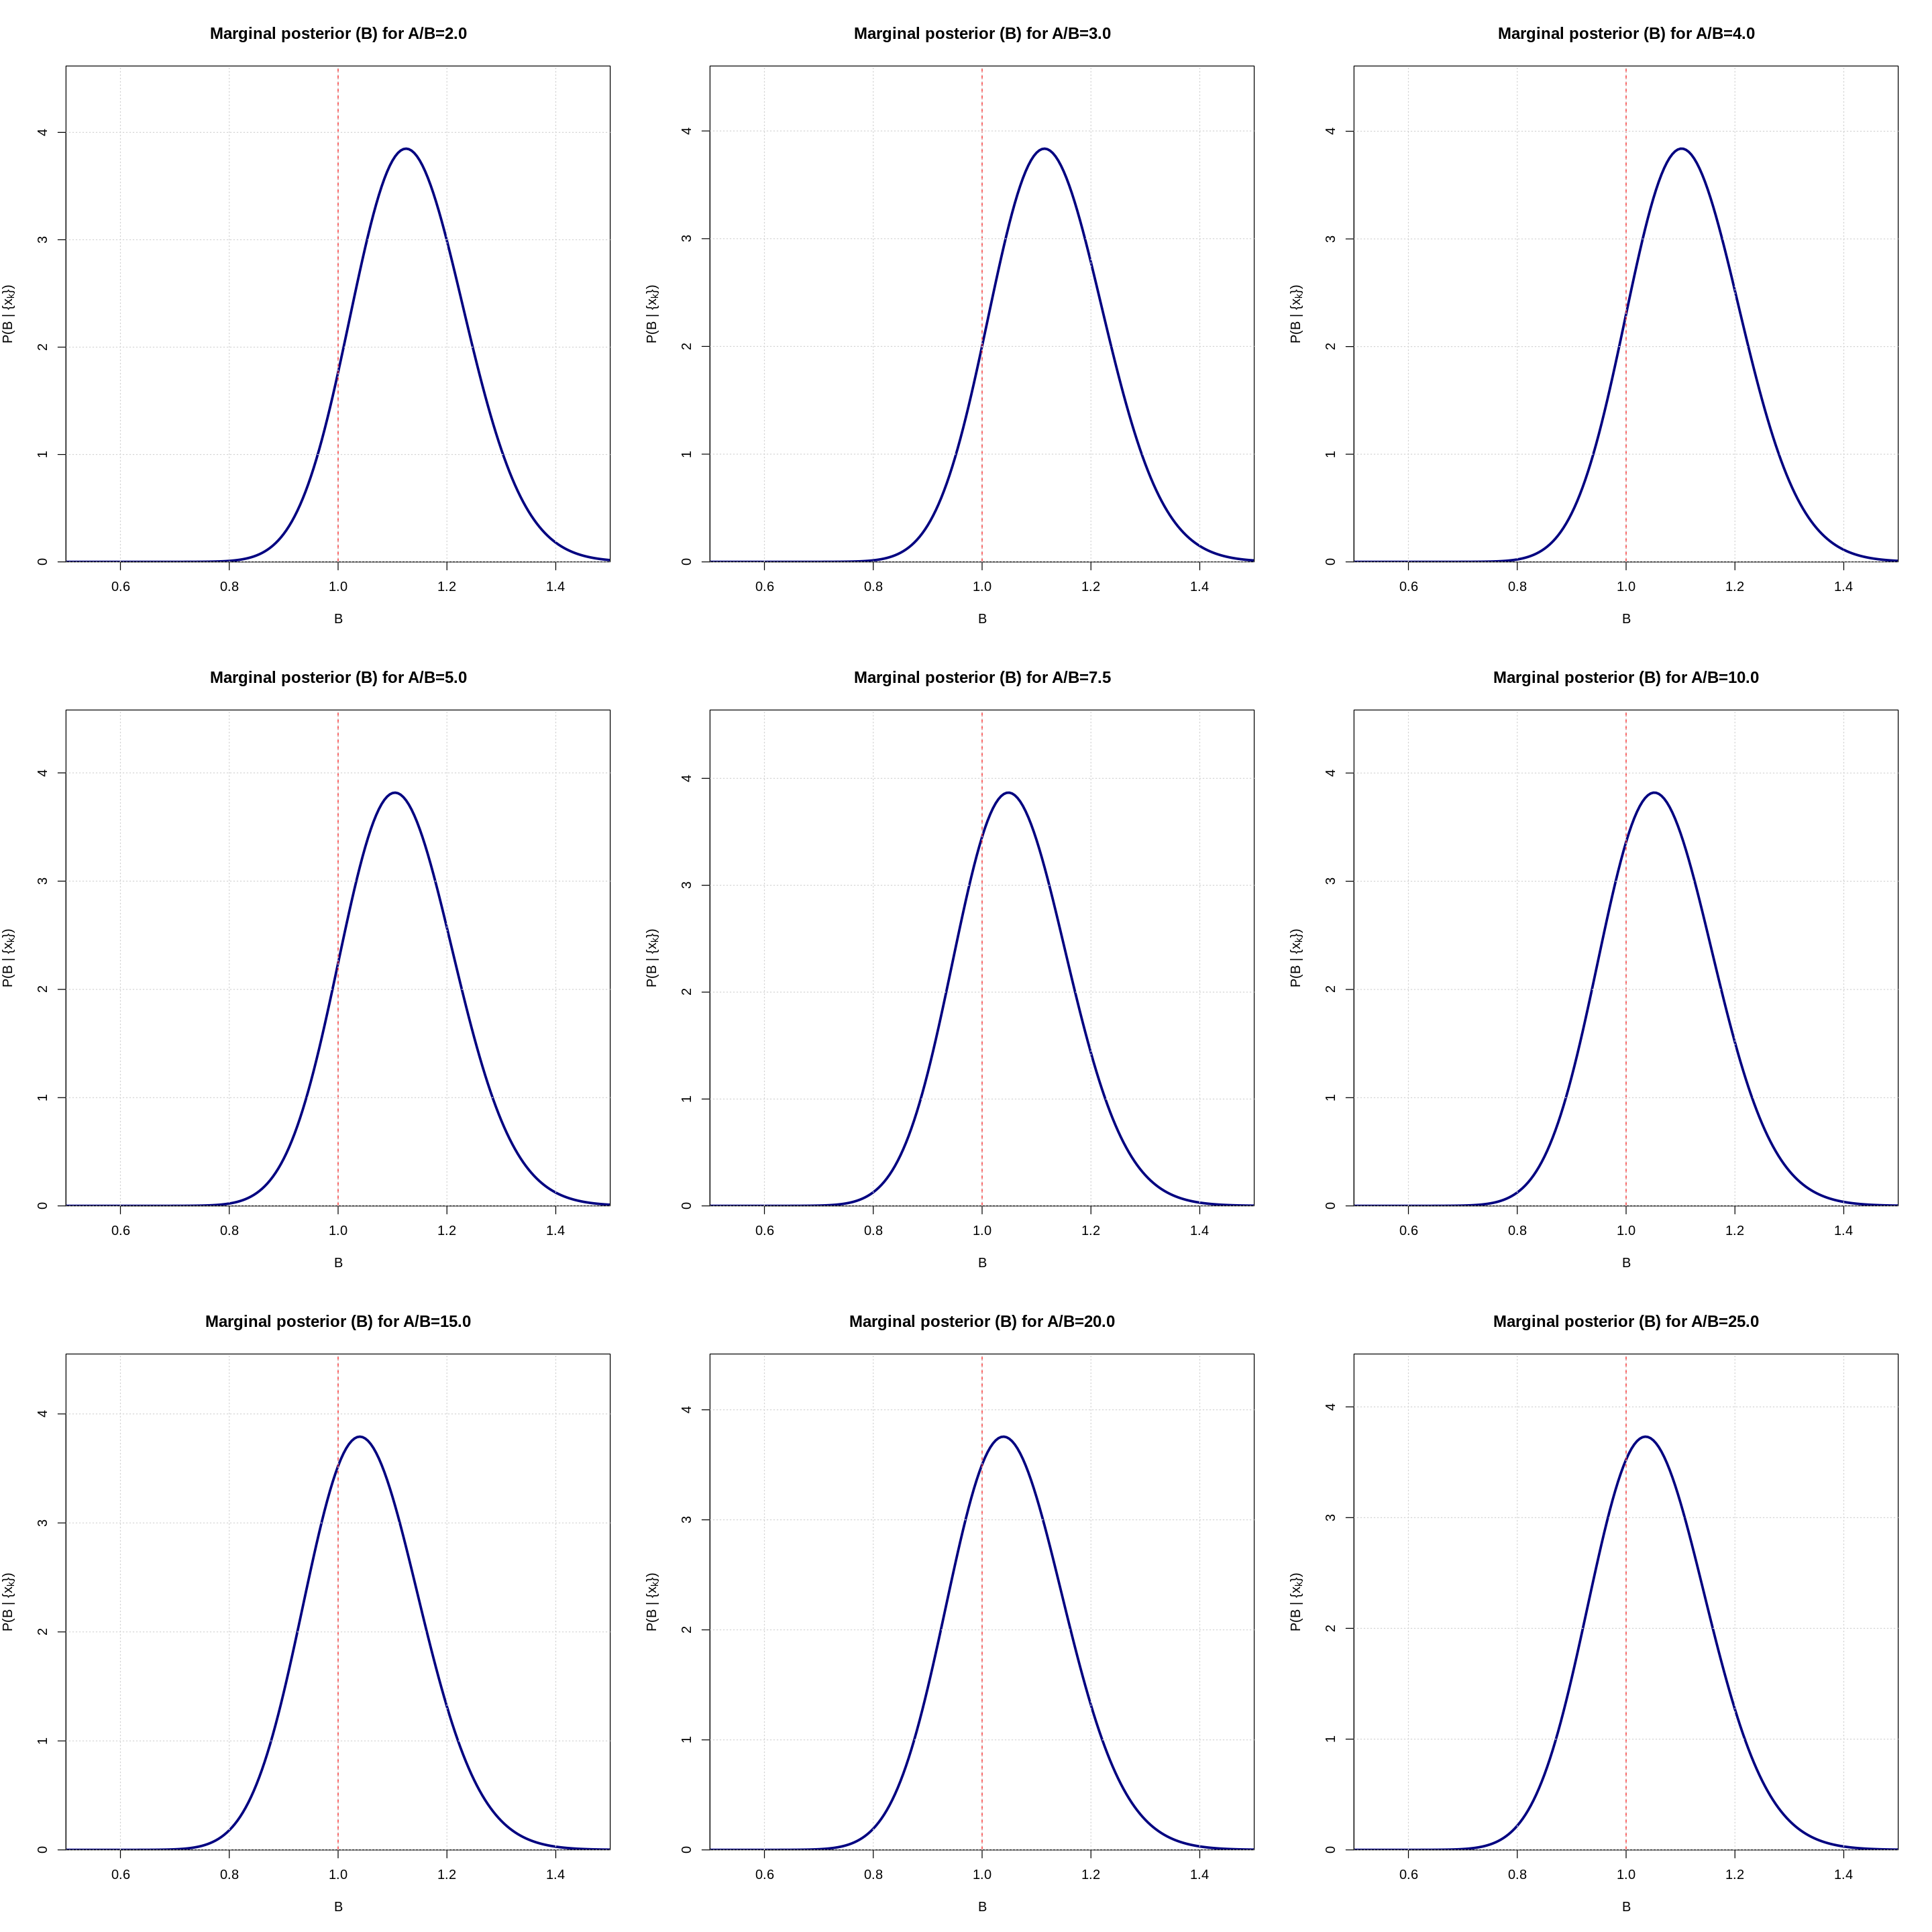

In [195]:
par(mfrow=c(3, 3), cex=1)
options(repr.plot.width=24, repr.plot.height=24)
for (A.true in As.true) {
    l.A <- 100 * A.true + 1
    l.B <- 201
    A   <- seq(0.0, 2*A.true, length.out=l.A)
    B   <- seq(0.5, 1.5, length.out=l.B)
    DA  <- A[2] - A[1]
    DB  <- B[2] - B[1]
    SNR <- A.true / B.true
    
    set.seed(1231629)
    xdata  <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdata , A.true, B.true , x0, w, Dt)
    ddata  <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow=length(A), ncol=length(B))
    for(j in 1:length(A)) {
        for(k in 1:length(B)) {
            z[j,k] <- log.post(ddata, xdata, A[j], B[k], x0, w, Dt)
        }
    }
    z <- z - max(z) # set maximum to zero

    z.b   <- apply(exp(z), 2, sum)
    z.b.n <- z.b / (DB * sum(z.b))
    
    # Plot normalized marginal posterior for A
    plot(B, z.b.n,
        xaxs='i', yaxs='i', col='navy', 
        type='l', lty=1, lwd = 3, 
        ylim=c(0,1.2*max(z.b.n)), 
        xlab=expression(B),
        ylab=expression(paste("P(",B," | {x"["k"],"})")),
        main=sprintf("Marginal posterior (B) for A/B=%2.1f",SNR))
    abline(v=1, col="red", lty=2)
    grid()
}